# **Object Tracking**

**The main aim of object tracking for my project is to find out if we can successfully count the cars in left and right lanes seperately or not. To perform that task we must perform object detection using YOLOv3 and then track those objects using Deep Sort algorithm. After Doing that Put some conditions on image pixels to check if we can get the count of the number of vehicles in each lane.**

In [1]:
!git clone https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git

Cloning into 'TensorFlow-2.x-YOLOv3'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 757 (delta 6), reused 1 (delta 0), pack-reused 740
Receiving objects: 100% (757/757), 70.77 MiB | 39.93 MiB/s, done.
Resolving deltas: 100% (441/441), done.


In [2]:
import os
os.chdir('/content/TensorFlow-2.x-YOLOv3')

In [3]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 320.4MB 52kB/s 
     |████████████████████████████████| 320.4MB 55kB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
     |████████████████████████████████| 3.5MB 58.1MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
     |████████████████████████████████| 460kB 48.1MB/s 
     |████████████████████████████████| 71kB 12.2MB/s 
     |████████████████████████████████| 7.2MB 44.2MB/s 
     |████████████████████████████████| 552kB 61.0MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=afd762b0f0151f9ffbe91c6d41bfd02a70d7d6a0dbe6ce7ccc2818eff8ed6baf
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [4]:
"""Mounting the Google Drive"""
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""This is to download the YOLOv3 weights. I am downloading it to G-Dirve"""
!wget -P /content/drive/MyDrive/Yolo https://pjreddie.com/media/files/yolov3.weights

--2020-12-22 12:37:37--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/Yolo/yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   274KB/s    in 13m 13s 

2020-12-22 12:50:50 (305 KB/s) - ‘/content/drive/MyDrive/Yolo/yolov3.weights.1’ saved [248007048/248007048]



**CONFIGS**

In [5]:
"""Variable Configuration"""
YOLO_TYPE                   = "yolov3" # yolov4 or yolov3
YOLO_FRAMEWORK              = "tf" # "tf" or "trt"
YOLO_V3_WEIGHTS             = "/content/drive/MyDrive/Yolo/yolov3.weights.1" # Loading The Pretrained Weights
YOLO_V4_WEIGHTS             = "model_data/yolov4.weights"
YOLO_V3_TINY_WEIGHTS        = "model_data/yolov3-tiny.weights"
YOLO_V4_TINY_WEIGHTS        = "model_data/yolov4-tiny.weights"
YOLO_TRT_QUANTIZE_MODE      = "INT8" # INT8, FP16, FP32
YOLO_CUSTOM_WEIGHTS         = False # "checkpoints/yolov3_custom" # used in evaluate_mAP.py and custom model detection, if not using leave False
                            # YOLO_CUSTOM_WEIGHTS also used with TensorRT and custom model detection
YOLO_COCO_CLASSES           = "model_data/coco/coco.names"
YOLO_STRIDES                = [8, 16, 32]
YOLO_IOU_LOSS_THRESH        = 0.5
YOLO_ANCHOR_PER_SCALE       = 3
YOLO_MAX_BBOX_PER_SCALE     = 100
YOLO_INPUT_SIZE             = 416

# if YOLO_TYPE                == "yolov4":
#     YOLO_ANCHORS            = [[[12,  16], [19,   36], [40,   28]],
#                                [[36,  75], [76,   55], [72,  146]],
#                                [[142,110], [192, 243], [459, 401]]]

if YOLO_TYPE                == "yolov3":
    YOLO_ANCHORS            = [[[10,  13], [16,   30], [33,   23]],
                               [[30,  61], [62,   45], [59,  119]],
                               [[116, 90], [156, 198], [373, 326]]]
# Train options
TRAIN_YOLO_TINY             = False
TRAIN_SAVE_BEST_ONLY        = True # saves only best model according validation loss (True recommended)
TRAIN_SAVE_CHECKPOINT       = False # saves all best validated checkpoints in training process (may require a lot disk space) (False recommended)
TRAIN_CLASSES               = "model_data/coco/coco.names"
TRAIN_ANNOT_PATH            = "mnist/mnist_train.txt"
TRAIN_LOGDIR                = "log"
TRAIN_CHECKPOINTS_FOLDER    = "checkpoints"
TRAIN_MODEL_NAME            = f"{YOLO_TYPE}_custom"
TRAIN_LOAD_IMAGES_TO_RAM    = True # With True faster training, but need more RAM
TRAIN_BATCH_SIZE            = 4
TRAIN_INPUT_SIZE            = 416
TRAIN_DATA_AUG              = True
TRAIN_TRANSFER              = True
TRAIN_FROM_CHECKPOINT       = False # "checkpoints/yolov3_custom"
TRAIN_LR_INIT               = 1e-4
TRAIN_LR_END                = 1e-6
TRAIN_WARMUP_EPOCHS         = 2
TRAIN_EPOCHS                = 100

# # TEST options
# TEST_ANNOT_PATH             = "mnist/mnist_test.txt"
# TEST_BATCH_SIZE             = 4
# TEST_INPUT_SIZE             = 416
# TEST_DATA_AUG               = False
# TEST_DECTECTED_IMAGE_PATH   = ""
# TEST_SCORE_THRESHOLD        = 0.3
# TEST_IOU_THRESHOLD          = 0.45


# if TRAIN_YOLO_TINY:
#     YOLO_STRIDES            = [16, 32, 64]    
#     YOLO_ANCHORS            = [[[10,  14], [23,   27], [37,   58]],
#                                [[81,  82], [135, 169], [344, 319]],
#                                [[0,    0], [0,     0], [0,     0]]]


***UTILS.PY***

In [6]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, LeakyReLU, ZeroPadding2D, BatchNormalization, MaxPool2D
from tensorflow.keras.regularizers import l2

STRIDES         = np.array(YOLO_STRIDES)
ANCHORS         = (np.array(YOLO_ANCHORS).T/STRIDES).T

def read_class_names(class_file_name):
    # loads class name from a file
    names = {}
    with open(class_file_name, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names

class BatchNormalization(BatchNormalization):
    # "Frozen state" and "inference mode" are two separate concepts.
    # `layer.trainable = False` is to freeze the layer, so the layer will use
    # stored moving `var` and `mean` in the "inference mode", and both `gama`
    # and `beta` will not be updated !
    def call(self, x, training=False):
        if not training:
            training = tf.constant(False)
        training = tf.logical_and(training, self.trainable)
        return super().call(x, training)

def convolutional(input_layer, filters_shape, downsample=False, activate=True, bn=True, activate_type='leaky'):
    if downsample:
        input_layer = ZeroPadding2D(((1, 0), (1, 0)))(input_layer)
        padding = 'valid'
        strides = 2
    else:
        strides = 1
        padding = 'same'

    conv = Conv2D(filters=filters_shape[-1], kernel_size = filters_shape[0], strides=strides,
                  padding=padding, use_bias=not bn, kernel_regularizer=l2(0.0005),
                  kernel_initializer=tf.random_normal_initializer(stddev=0.01),
                  bias_initializer=tf.constant_initializer(0.))(input_layer)
    if bn:
        conv = BatchNormalization()(conv)
    if activate == True:
        if activate_type == "leaky":
            conv = LeakyReLU(alpha=0.1)(conv)
        elif activate_type == "mish":
            conv = mish(conv)

    return conv

def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

def residual_block(input_layer, input_channel, filter_num1, filter_num2, activate_type='leaky'):
    short_cut = input_layer
    conv = convolutional(input_layer, filters_shape=(1, 1, input_channel, filter_num1), activate_type=activate_type)
    conv = convolutional(conv       , filters_shape=(3, 3, filter_num1,   filter_num2), activate_type=activate_type)

    residual_output = short_cut + conv
    return residual_output

def upsample(input_layer):
    return tf.image.resize(input_layer, (input_layer.shape[1] * 2, input_layer.shape[2] * 2), method='nearest')

def route_group(input_layer, groups, group_id):
    convs = tf.split(input_layer, num_or_size_splits=groups, axis=-1)
    return convs[group_id]

def darknet53(input_data):
    input_data = convolutional(input_data, (3, 3,  3,  32))
    input_data = convolutional(input_data, (3, 3, 32,  64), downsample=True)

    for i in range(1):
        input_data = residual_block(input_data,  64,  32, 64)

    input_data = convolutional(input_data, (3, 3,  64, 128), downsample=True)

    for i in range(2):
        input_data = residual_block(input_data, 128,  64, 128)

    input_data = convolutional(input_data, (3, 3, 128, 256), downsample=True)

    for i in range(8):
        input_data = residual_block(input_data, 256, 128, 256)

    route_1 = input_data
    input_data = convolutional(input_data, (3, 3, 256, 512), downsample=True)

    for i in range(8):
        input_data = residual_block(input_data, 512, 256, 512)

    route_2 = input_data
    input_data = convolutional(input_data, (3, 3, 512, 1024), downsample=True)

    for i in range(4):
        input_data = residual_block(input_data, 1024, 512, 1024)

    return route_1, route_2, input_data

def cspdarknet53(input_data):
    input_data = convolutional(input_data, (3, 3,  3,  32), activate_type="mish")
    input_data = convolutional(input_data, (3, 3, 32,  64), downsample=True, activate_type="mish")

    route = input_data
    route = convolutional(route, (1, 1, 64, 64), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 64, 64), activate_type="mish")
    for i in range(1):
        input_data = residual_block(input_data,  64,  32, 64, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 64, 64), activate_type="mish")

    input_data = tf.concat([input_data, route], axis=-1)
    input_data = convolutional(input_data, (1, 1, 128, 64), activate_type="mish")
    input_data = convolutional(input_data, (3, 3, 64, 128), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 128, 64), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 128, 64), activate_type="mish")
    for i in range(2):
        input_data = residual_block(input_data, 64,  64, 64, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 64, 64), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 128, 128), activate_type="mish")
    input_data = convolutional(input_data, (3, 3, 128, 256), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 256, 128), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 256, 128), activate_type="mish")
    for i in range(8):
        input_data = residual_block(input_data, 128, 128, 128, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 128, 128), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 256, 256), activate_type="mish")
    route_1 = input_data
    input_data = convolutional(input_data, (3, 3, 256, 512), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 512, 256), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 512, 256), activate_type="mish")
    for i in range(8):
        input_data = residual_block(input_data, 256, 256, 256, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 256, 256), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 512, 512), activate_type="mish")
    route_2 = input_data
    input_data = convolutional(input_data, (3, 3, 512, 1024), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 1024, 512), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 1024, 512), activate_type="mish")
    for i in range(4):
        input_data = residual_block(input_data, 512, 512, 512, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 512, 512), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 1024, 1024), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 1024, 512))
    input_data = convolutional(input_data, (3, 3, 512, 1024))
    input_data = convolutional(input_data, (1, 1, 1024, 512))

    input_data = tf.concat([tf.nn.max_pool(input_data, ksize=13, padding='SAME', strides=1), tf.nn.max_pool(input_data, ksize=9, padding='SAME', strides=1)
                            , tf.nn.max_pool(input_data, ksize=5, padding='SAME', strides=1), input_data], axis=-1)
    input_data = convolutional(input_data, (1, 1, 2048, 512))
    input_data = convolutional(input_data, (3, 3, 512, 1024))
    input_data = convolutional(input_data, (1, 1, 1024, 512))

    return route_1, route_2, input_data


def cspdarknet53_tiny(input_data): # not sure how this should be called
    input_data = convolutional(input_data, (3, 3, 3, 32), downsample=True)
    input_data = convolutional(input_data, (3, 3, 32, 64), downsample=True)
    input_data = convolutional(input_data, (3, 3, 64, 64))

    route = input_data
    input_data = route_group(input_data, 2, 1)
    input_data = convolutional(input_data, (3, 3, 32, 32))
    route_1 = input_data
    input_data = convolutional(input_data, (3, 3, 32, 32))
    input_data = tf.concat([input_data, route_1], axis=-1)
    input_data = convolutional(input_data, (1, 1, 32, 64))
    input_data = tf.concat([route, input_data], axis=-1)
    input_data = MaxPool2D(2, 2, 'same')(input_data)

    input_data = convolutional(input_data, (3, 3, 64, 128))
    route = input_data
    input_data = route_group(input_data, 2, 1)
    input_data = convolutional(input_data, (3, 3, 64, 64))
    route_1 = input_data
    input_data = convolutional(input_data, (3, 3, 64, 64))
    input_data = tf.concat([input_data, route_1], axis=-1)
    input_data = convolutional(input_data, (1, 1, 64, 128))
    input_data = tf.concat([route, input_data], axis=-1)
    input_data = MaxPool2D(2, 2, 'same')(input_data)

    input_data = convolutional(input_data, (3, 3, 128, 256))
    route = input_data
    input_data = route_group(input_data, 2, 1)
    input_data = convolutional(input_data, (3, 3, 128, 128))
    route_1 = input_data
    input_data = convolutional(input_data, (3, 3, 128, 128))
    input_data = tf.concat([input_data, route_1], axis=-1)
    input_data = convolutional(input_data, (1, 1, 128, 256))
    route_1 = input_data
    input_data = tf.concat([route, input_data], axis=-1)
    input_data = MaxPool2D(2, 2, 'same')(input_data)

    input_data = convolutional(input_data, (3, 3, 512, 512))

    return route_1, input_data

def YOLOv3(input_layer, NUM_CLASS):
    # After the input layer enters the Darknet-53 network, we get three branches

    route_1, route_2, conv = darknet53(input_layer)

    conv = convolutional(conv, (1, 1, 1024,  512))
    conv = convolutional(conv, (3, 3,  512, 1024))
    conv = convolutional(conv, (1, 1, 1024,  512))
    conv = convolutional(conv, (3, 3,  512, 1024))
    conv = convolutional(conv, (1, 1, 1024,  512))
    conv_lobj_branch = convolutional(conv, (3, 3, 512, 1024))
    



    # conv_lbbox is used to predict large-sized objects , Shape = [None, 13, 13, 255] 

    conv_lbbox = convolutional(conv_lobj_branch, (1, 1, 1024, 3*(NUM_CLASS + 5)), activate=False, bn=False)

    conv = convolutional(conv, (1, 1,  512,  256))
    # upsample here uses the nearest neighbor interpolation method, which has the advantage that the
    # upsampling process does not need to learn, thereby reducing the network parameter  
    conv = upsample(conv)

    conv = tf.concat([conv, route_2], axis=-1)
    conv = convolutional(conv, (1, 1, 768, 256))
    conv = convolutional(conv, (3, 3, 256, 512))
    conv = convolutional(conv, (1, 1, 512, 256))
    conv = convolutional(conv, (3, 3, 256, 512))
    conv = convolutional(conv, (1, 1, 512, 256))
    conv_mobj_branch = convolutional(conv, (3, 3, 256, 512))



    # conv_mbbox is used to predict medium-sized objects, shape = [None, 26, 26, 255]

    conv_mbbox = convolutional(conv_mobj_branch, (1, 1, 512, 3*(NUM_CLASS + 5)), activate=False, bn=False)

    conv = convolutional(conv, (1, 1, 256, 128))
    conv = upsample(conv)

    conv = tf.concat([conv, route_1], axis=-1)
    conv = convolutional(conv, (1, 1, 384, 128))
    conv = convolutional(conv, (3, 3, 128, 256))
    conv = convolutional(conv, (1, 1, 256, 128))
    conv = convolutional(conv, (3, 3, 128, 256))
    conv = convolutional(conv, (1, 1, 256, 128))
    conv_sobj_branch = convolutional(conv, (3, 3, 128, 256))
    


    # conv_sbbox is used to predict small size objects, shape = [None, 52, 52, 255]

    conv_sbbox = convolutional(conv_sobj_branch, (1, 1, 256, 3*(NUM_CLASS +5)), activate=False, bn=False)
        
    return [conv_sbbox, conv_mbbox, conv_lbbox]


def Create_Yolo(input_size=416, channels=3, training=False, CLASSES=YOLO_COCO_CLASSES):
    NUM_CLASS = len(read_class_names(CLASSES))
    input_layer  = Input([input_size, input_size, channels])

    if TRAIN_YOLO_TINY:
        if YOLO_TYPE == "yolov4":
            conv_tensors = YOLOv4_tiny(input_layer, NUM_CLASS)
        if YOLO_TYPE == "yolov3":
            conv_tensors = YOLOv3_tiny(input_layer, NUM_CLASS)
    else:
        if YOLO_TYPE == "yolov4":
            conv_tensors = YOLOv4(input_layer, NUM_CLASS)
        if YOLO_TYPE == "yolov3":
            conv_tensors = YOLOv3(input_layer, NUM_CLASS)

    output_tensors = []
    for i, conv_tensor in enumerate(conv_tensors):
        pred_tensor = decode(conv_tensor, NUM_CLASS, i)
        if training: output_tensors.append(conv_tensor)
        output_tensors.append(pred_tensor)

    Yolo = tf.keras.Model(input_layer, output_tensors)
    return Yolo


def decode(conv_output, NUM_CLASS, i=0):
    # where i = 0, 1 or 2 to correspond to the three grid scales  
    conv_shape       = tf.shape(conv_output)
    batch_size       = conv_shape[0]
    output_size      = conv_shape[1]

    conv_output = tf.reshape(conv_output, (batch_size, output_size, output_size, 3, 5 + NUM_CLASS))

    #conv_raw_dxdy = conv_output[:, :, :, :, 0:2] # offset of center position     
    #conv_raw_dwdh = conv_output[:, :, :, :, 2:4] # Prediction box length and width offset
    #conv_raw_conf = conv_output[:, :, :, :, 4:5] # confidence of the prediction box
    #conv_raw_prob = conv_output[:, :, :, :, 5: ] # category probability of the prediction box
    conv_raw_dxdy, conv_raw_dwdh, conv_raw_conf, conv_raw_prob = tf.split(conv_output, (2, 2, 1, NUM_CLASS), axis=-1)

    # next need Draw the grid. Where output_size is equal to 13, 26 or 52  
    #y = tf.range(output_size, dtype=tf.int32)
    #y = tf.expand_dims(y, -1)
    #y = tf.tile(y, [1, output_size])
    #x = tf.range(output_size,dtype=tf.int32)
    #x = tf.expand_dims(x, 0)
    #x = tf.tile(x, [output_size, 1])
    xy_grid = tf.meshgrid(tf.range(output_size), tf.range(output_size))
    xy_grid = tf.expand_dims(tf.stack(xy_grid, axis=-1), axis=2)  # [gx, gy, 1, 2]
    xy_grid = tf.tile(tf.expand_dims(xy_grid, axis=0), [batch_size, 1, 1, 3, 1])
    xy_grid = tf.cast(xy_grid, tf.float32)
    
    #xy_grid = tf.concat([x[:, :, tf.newaxis], y[:, :, tf.newaxis]], axis=-1)
    #xy_grid = tf.tile(xy_grid[tf.newaxis, :, :, tf.newaxis, :], [batch_size, 1, 1, 3, 1])
    #y_grid = tf.cast(xy_grid, tf.float32)

    # Calculate the center position of the prediction box:
    pred_xy = (tf.sigmoid(conv_raw_dxdy) + xy_grid) * STRIDES[i]
    # Calculate the length and width of the prediction box:
    pred_wh = (tf.exp(conv_raw_dwdh) * ANCHORS[i]) * STRIDES[i]

    pred_xywh = tf.concat([pred_xy, pred_wh], axis=-1)
    pred_conf = tf.sigmoid(conv_raw_conf) # object box calculates the predicted confidence
    pred_prob = tf.sigmoid(conv_raw_prob) # calculating the predicted probability category box object

    # calculating the predicted probability category box object
    return tf.concat([pred_xywh, pred_conf, pred_prob], axis=-1)


def bbox_iou(boxes1, boxes2):
    boxes1_area = boxes1[..., 2] * boxes1[..., 3]
    boxes2_area = boxes2[..., 2] * boxes2[..., 3]

    boxes1 = tf.concat([boxes1[..., :2] - boxes1[..., 2:] * 0.5,
                        boxes1[..., :2] + boxes1[..., 2:] * 0.5], axis=-1)
    boxes2 = tf.concat([boxes2[..., :2] - boxes2[..., 2:] * 0.5,
                        boxes2[..., :2] + boxes2[..., 2:] * 0.5], axis=-1)

    left_up = tf.maximum(boxes1[..., :2], boxes2[..., :2])
    right_down = tf.minimum(boxes1[..., 2:], boxes2[..., 2:])

    inter_section = tf.maximum(right_down - left_up, 0.0)
    inter_area = inter_section[..., 0] * inter_section[..., 1]
    union_area = boxes1_area + boxes2_area - inter_area

    return 1.0 * inter_area / union_area

def bbox_giou(boxes1, boxes2):
    boxes1 = tf.concat([boxes1[..., :2] - boxes1[..., 2:] * 0.5,
                        boxes1[..., :2] + boxes1[..., 2:] * 0.5], axis=-1)
    boxes2 = tf.concat([boxes2[..., :2] - boxes2[..., 2:] * 0.5,
                        boxes2[..., :2] + boxes2[..., 2:] * 0.5], axis=-1)

    boxes1 = tf.concat([tf.minimum(boxes1[..., :2], boxes1[..., 2:]),
                        tf.maximum(boxes1[..., :2], boxes1[..., 2:])], axis=-1)
    boxes2 = tf.concat([tf.minimum(boxes2[..., :2], boxes2[..., 2:]),
                        tf.maximum(boxes2[..., :2], boxes2[..., 2:])], axis=-1)

    boxes1_area = (boxes1[..., 2] - boxes1[..., 0]) * (boxes1[..., 3] - boxes1[..., 1])
    boxes2_area = (boxes2[..., 2] - boxes2[..., 0]) * (boxes2[..., 3] - boxes2[..., 1])

    left_up = tf.maximum(boxes1[..., :2], boxes2[..., :2])
    right_down = tf.minimum(boxes1[..., 2:], boxes2[..., 2:])

    inter_section = tf.maximum(right_down - left_up, 0.0)
    inter_area = inter_section[..., 0] * inter_section[..., 1]
    union_area = boxes1_area + boxes2_area - inter_area

    # Calculate the iou value between the two bounding boxes
    iou = inter_area / union_area

    # Calculate the coordinates of the upper left corner and the lower right corner of the smallest closed convex surface
    enclose_left_up = tf.minimum(boxes1[..., :2], boxes2[..., :2])
    enclose_right_down = tf.maximum(boxes1[..., 2:], boxes2[..., 2:])
    enclose = tf.maximum(enclose_right_down - enclose_left_up, 0.0)

    # Calculate the area of the smallest closed convex surface C
    enclose_area = enclose[..., 0] * enclose[..., 1]

    # Calculate the GIoU value according to the GioU formula  
    giou = iou - 1.0 * (enclose_area - union_area) / enclose_area

    return giou

# testing (should be better than giou)
def bbox_ciou(boxes1, boxes2):
    boxes1_coor = tf.concat([boxes1[..., :2] - boxes1[..., 2:] * 0.5,
                        boxes1[..., :2] + boxes1[..., 2:] * 0.5], axis=-1)
    boxes2_coor = tf.concat([boxes2[..., :2] - boxes2[..., 2:] * 0.5,
                        boxes2[..., :2] + boxes2[..., 2:] * 0.5], axis=-1)

    left = tf.maximum(boxes1_coor[..., 0], boxes2_coor[..., 0])
    up = tf.maximum(boxes1_coor[..., 1], boxes2_coor[..., 1])
    right = tf.maximum(boxes1_coor[..., 2], boxes2_coor[..., 2])
    down = tf.maximum(boxes1_coor[..., 3], boxes2_coor[..., 3])

    c = (right - left) * (right - left) + (up - down) * (up - down)
    iou = bbox_iou(boxes1, boxes2)

    u = (boxes1[..., 0] - boxes2[..., 0]) * (boxes1[..., 0] - boxes2[..., 0]) + (boxes1[..., 1] - boxes2[..., 1]) * (boxes1[..., 1] - boxes2[..., 1])
    d = u / c

    ar_gt = boxes2[..., 2] / boxes2[..., 3]
    ar_pred = boxes1[..., 2] / boxes1[..., 3]

    ar_loss = 4 / (np.pi * np.pi) * (tf.atan(ar_gt) - tf.atan(ar_pred)) * (tf.atan(ar_gt) - tf.atan(ar_pred))
    alpha = ar_loss / (1 - iou + ar_loss + 0.000001)
    ciou_term = d + alpha * ar_loss

    return iou - ciou_term


def compute_loss(pred, conv, label, bboxes, i=0, CLASSES=YOLO_COCO_CLASSES):
    NUM_CLASS = len(read_class_names(CLASSES))
    conv_shape  = tf.shape(conv)
    batch_size  = conv_shape[0]
    output_size = conv_shape[1]
    input_size  = STRIDES[i] * output_size
    conv = tf.reshape(conv, (batch_size, output_size, output_size, 3, 5 + NUM_CLASS))

    conv_raw_conf = conv[:, :, :, :, 4:5]
    conv_raw_prob = conv[:, :, :, :, 5:]

    pred_xywh     = pred[:, :, :, :, 0:4]
    pred_conf     = pred[:, :, :, :, 4:5]

    label_xywh    = label[:, :, :, :, 0:4]
    respond_bbox  = label[:, :, :, :, 4:5]
    label_prob    = label[:, :, :, :, 5:]

    giou = tf.expand_dims(bbox_giou(pred_xywh, label_xywh), axis=-1)
    input_size = tf.cast(input_size, tf.float32)

    bbox_loss_scale = 2.0 - 1.0 * label_xywh[:, :, :, :, 2:3] * label_xywh[:, :, :, :, 3:4] / (input_size ** 2)
    giou_loss = respond_bbox * bbox_loss_scale * (1 - giou)

    iou = bbox_iou(pred_xywh[:, :, :, :, np.newaxis, :], bboxes[:, np.newaxis, np.newaxis, np.newaxis, :, :])
    # Find the value of IoU with the real box The largest prediction box
    max_iou = tf.expand_dims(tf.reduce_max(iou, axis=-1), axis=-1)

    # If the largest iou is less than the threshold, it is considered that the prediction box contains no objects, then the background box
    respond_bgd = (1.0 - respond_bbox) * tf.cast( max_iou < YOLO_IOU_LOSS_THRESH, tf.float32 )

    conf_focal = tf.pow(respond_bbox - pred_conf, 2)

    # Calculate the loss of confidence
    # we hope that if the grid contains objects, then the network output prediction box has a confidence of 1 and 0 when there is no object.
    conf_loss = conf_focal * (
            respond_bbox * tf.nn.sigmoid_cross_entropy_with_logits(labels=respond_bbox, logits=conv_raw_conf)
            +
            respond_bgd * tf.nn.sigmoid_cross_entropy_with_logits(labels=respond_bbox, logits=conv_raw_conf)
    )

    prob_loss = respond_bbox * tf.nn.sigmoid_cross_entropy_with_logits(labels=label_prob, logits=conv_raw_prob)

    giou_loss = tf.reduce_mean(tf.reduce_sum(giou_loss, axis=[1,2,3,4]))
    conf_loss = tf.reduce_mean(tf.reduce_sum(conf_loss, axis=[1,2,3,4]))
    prob_loss = tf.reduce_mean(tf.reduce_sum(prob_loss, axis=[1,2,3,4]))

    return giou_loss, conf_loss, prob_loss


In [7]:
from multiprocessing import Process, Queue, Pipe
import cv2
import time
import random
import colorsys
import numpy as np
import tensorflow as tf
from tensorflow.python.saved_model import tag_constants

def load_yolo_weights(model, weights_file):
    tf.keras.backend.clear_session() # used to reset layer names
    # load Darknet original weights to TensorFlow model
    if YOLO_TYPE == "yolov3":
        range1 = 75 if not TRAIN_YOLO_TINY else 13
        range2 = [58, 66, 74] if not TRAIN_YOLO_TINY else [9, 12]
    if YOLO_TYPE == "yolov4":
        range1 = 110 if not TRAIN_YOLO_TINY else 21
        range2 = [93, 101, 109] if not TRAIN_YOLO_TINY else [17, 20]
    
    with open(weights_file, 'rb') as wf:
        major, minor, revision, seen, _ = np.fromfile(wf, dtype=np.int32, count=5)

        j = 0
        for i in range(range1):
            if i > 0:
                conv_layer_name = 'conv2d_%d' %i
            else:
                conv_layer_name = 'conv2d'
                
            if j > 0:
                bn_layer_name = 'batch_normalization_%d' %j
            else:
                bn_layer_name = 'batch_normalization'
            
            conv_layer = model.get_layer(conv_layer_name)
            filters = conv_layer.filters
            k_size = conv_layer.kernel_size[0]
            in_dim = conv_layer.input_shape[-1]

            if i not in range2:
                # darknet weights: [beta, gamma, mean, variance]
                bn_weights = np.fromfile(wf, dtype=np.float32, count=4 * filters)
                # tf weights: [gamma, beta, mean, variance]
                bn_weights = bn_weights.reshape((4, filters))[[1, 0, 2, 3]]
                bn_layer = model.get_layer(bn_layer_name)
                j += 1
            else:
                conv_bias = np.fromfile(wf, dtype=np.float32, count=filters)

            # darknet shape (out_dim, in_dim, height, width)
            conv_shape = (filters, in_dim, k_size, k_size)
            conv_weights = np.fromfile(wf, dtype=np.float32, count=np.product(conv_shape))
            # tf shape (height, width, in_dim, out_dim)
            conv_weights = conv_weights.reshape(conv_shape).transpose([2, 3, 1, 0])

            if i not in range2:
                conv_layer.set_weights([conv_weights])
                bn_layer.set_weights(bn_weights)
            else:
                conv_layer.set_weights([conv_weights, conv_bias])

        assert len(wf.read()) == 0, 'failed to read all data'

def Load_Yolo_model():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if len(gpus) > 0:
        print(f'GPUs {gpus}')
        try: tf.config.experimental.set_memory_growth(gpus[0], True)
        except RuntimeError: pass
        
    if YOLO_FRAMEWORK == "tf": # TensorFlow detection
        if YOLO_TYPE == "yolov4":
            Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
        if YOLO_TYPE == "yolov3":
            Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS
            
        if YOLO_CUSTOM_WEIGHTS == False:
            print("Loading Darknet_weights from:", Darknet_weights)
            yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=YOLO_COCO_CLASSES)
            load_yolo_weights(yolo, Darknet_weights) # use Darknet weights
        else:
            print("Loading custom weights from:", YOLO_CUSTOM_WEIGHTS)
            yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
            yolo.load_weights(f"./checkpoints/{TRAIN_MODEL_NAME}") # use custom weights
        
    elif YOLO_FRAMEWORK == "trt": # TensorRT detection
        saved_model_loaded = tf.saved_model.load(YOLO_CUSTOM_WEIGHTS, tags=[tag_constants.SERVING])
        signature_keys = list(saved_model_loaded.signatures.keys())
        yolo = saved_model_loaded.signatures['serving_default']

    return yolo

def image_preprocess(image, target_size, gt_boxes=None):
    ih, iw    = target_size
    h,  w, _  = image.shape

    scale = min(iw/w, ih/h)
    nw, nh  = int(scale * w), int(scale * h)
    image_resized = cv2.resize(image, (nw, nh))

    image_paded = np.full(shape=[ih, iw, 3], fill_value=128.0)
    dw, dh = (iw - nw) // 2, (ih-nh) // 2
    image_paded[dh:nh+dh, dw:nw+dw, :] = image_resized
    image_paded = image_paded / 255.

    if gt_boxes is None:
        return image_paded

    else:
        gt_boxes[:, [0, 2]] = gt_boxes[:, [0, 2]] * scale + dw
        gt_boxes[:, [1, 3]] = gt_boxes[:, [1, 3]] * scale + dh
        return image_paded, gt_boxes


def draw_bbox(image, bboxes, CLASSES=YOLO_COCO_CLASSES, show_label=True, show_confidence = True, Text_colors=(255,255,0), rectangle_colors='', tracking=False):   
    NUM_CLASS = read_class_names(CLASSES)
    num_classes = len(NUM_CLASS)
    image_h, image_w, _ = image.shape
    hsv_tuples = [(1.0 * x / num_classes, 1., 1.) for x in range(num_classes)]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))

    random.seed(0)
    random.shuffle(colors)
    random.seed(None)

    for i, bbox in enumerate(bboxes):
        coor = np.array(bbox[:4], dtype=np.int32)
        score = bbox[4]
        class_ind = int(bbox[5])
        bbox_color = rectangle_colors if rectangle_colors != '' else colors[class_ind]
        bbox_thick = int(0.6 * (image_h + image_w) / 1000)
        if bbox_thick < 1: bbox_thick = 1
        fontScale = 0.75 * bbox_thick
        (x1, y1), (x2, y2) = (coor[0], coor[1]), (coor[2], coor[3])

        # put object rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), bbox_color, bbox_thick*2)

        if show_label:
            # get text label
            score_str = " {:.2f}".format(score) if show_confidence else ""

            if tracking: score_str = " "+str(score)

            try:
                label = "{}".format(NUM_CLASS[class_ind]) + score_str
            except KeyError:
                print("You received KeyError, this might be that you are trying to use yolo original weights")
                print("while using custom classes, if using custom model in configs.py set YOLO_CUSTOM_WEIGHTS = True")

            # get text size
            (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX_SMALL,
                                                                  fontScale, thickness=bbox_thick)
            # put filled text rectangle
            cv2.rectangle(image, (x1, y1), (x1 + text_width, y1 - text_height - baseline), bbox_color, thickness=cv2.FILLED)

            # put text above rectangle
            cv2.putText(image, label, (x1, y1-4), cv2.FONT_HERSHEY_COMPLEX_SMALL,
                        fontScale, Text_colors, bbox_thick, lineType=cv2.LINE_AA)
    return image


def bboxes_iou(boxes1, boxes2):
    boxes1 = np.array(boxes1)
    boxes2 = np.array(boxes2)

    boxes1_area = (boxes1[..., 2] - boxes1[..., 0]) * (boxes1[..., 3] - boxes1[..., 1])
    boxes2_area = (boxes2[..., 2] - boxes2[..., 0]) * (boxes2[..., 3] - boxes2[..., 1])

    left_up       = np.maximum(boxes1[..., :2], boxes2[..., :2])
    right_down    = np.minimum(boxes1[..., 2:], boxes2[..., 2:])

    inter_section = np.maximum(right_down - left_up, 0.0)
    inter_area    = inter_section[..., 0] * inter_section[..., 1]
    union_area    = boxes1_area + boxes2_area - inter_area
    ious          = np.maximum(1.0 * inter_area / union_area, np.finfo(np.float32).eps)

    return ious


def nms(bboxes, iou_threshold, sigma=0.3, method='nms'):
    """
    :param bboxes: (xmin, ymin, xmax, ymax, score, class)

    Note: soft-nms, https://arxiv.org/pdf/1704.04503.pdf
          https://github.com/bharatsingh430/soft-nms
    """
    classes_in_img = list(set(bboxes[:, 5]))
    best_bboxes = []

    for cls in classes_in_img:
        cls_mask = (bboxes[:, 5] == cls)
        cls_bboxes = bboxes[cls_mask]
        # Process 1: Determine whether the number of bounding boxes is greater than 0 
        while len(cls_bboxes) > 0:
            # Process 2: Select the bounding box with the highest score according to socre order A
            max_ind = np.argmax(cls_bboxes[:, 4])
            best_bbox = cls_bboxes[max_ind]
            best_bboxes.append(best_bbox)
            cls_bboxes = np.concatenate([cls_bboxes[: max_ind], cls_bboxes[max_ind + 1:]])
            # Process 3: Calculate this bounding box A and
            # Remain all iou of the bounding box and remove those bounding boxes whose iou value is higher than the threshold 
            iou = bboxes_iou(best_bbox[np.newaxis, :4], cls_bboxes[:, :4])
            weight = np.ones((len(iou),), dtype=np.float32)

            assert method in ['nms', 'soft-nms']

            if method == 'nms':
                iou_mask = iou > iou_threshold
                weight[iou_mask] = 0.0

            if method == 'soft-nms':
                weight = np.exp(-(1.0 * iou ** 2 / sigma))

            cls_bboxes[:, 4] = cls_bboxes[:, 4] * weight
            score_mask = cls_bboxes[:, 4] > 0.
            cls_bboxes = cls_bboxes[score_mask]

    return best_bboxes


def postprocess_boxes(pred_bbox, original_image, input_size, score_threshold):
    valid_scale=[0, np.inf]
    pred_bbox = np.array(pred_bbox)

    pred_xywh = pred_bbox[:, 0:4]
    pred_conf = pred_bbox[:, 4]
    pred_prob = pred_bbox[:, 5:]

    # 1. (x, y, w, h) --> (xmin, ymin, xmax, ymax)
    pred_coor = np.concatenate([pred_xywh[:, :2] - pred_xywh[:, 2:] * 0.5,
                                pred_xywh[:, :2] + pred_xywh[:, 2:] * 0.5], axis=-1)
    # 2. (xmin, ymin, xmax, ymax) -> (xmin_org, ymin_org, xmax_org, ymax_org)
    org_h, org_w = original_image.shape[:2]
    resize_ratio = min(input_size / org_w, input_size / org_h)

    dw = (input_size - resize_ratio * org_w) / 2
    dh = (input_size - resize_ratio * org_h) / 2

    pred_coor[:, 0::2] = 1.0 * (pred_coor[:, 0::2] - dw) / resize_ratio
    pred_coor[:, 1::2] = 1.0 * (pred_coor[:, 1::2] - dh) / resize_ratio

    # 3. clip some boxes those are out of range
    pred_coor = np.concatenate([np.maximum(pred_coor[:, :2], [0, 0]),
                                np.minimum(pred_coor[:, 2:], [org_w - 1, org_h - 1])], axis=-1)
    invalid_mask = np.logical_or((pred_coor[:, 0] > pred_coor[:, 2]), (pred_coor[:, 1] > pred_coor[:, 3]))
    pred_coor[invalid_mask] = 0

    # 4. discard some invalid boxes
    bboxes_scale = np.sqrt(np.multiply.reduce(pred_coor[:, 2:4] - pred_coor[:, 0:2], axis=-1))
    scale_mask = np.logical_and((valid_scale[0] < bboxes_scale), (bboxes_scale < valid_scale[1]))

    # 5. discard boxes with low scores
    classes = np.argmax(pred_prob, axis=-1)
    scores = pred_conf * pred_prob[np.arange(len(pred_coor)), classes]
    score_mask = scores > score_threshold
    mask = np.logical_and(scale_mask, score_mask)
    coors, scores, classes = pred_coor[mask], scores[mask], classes[mask]

    return np.concatenate([coors, scores[:, np.newaxis], classes[:, np.newaxis]], axis=-1)


def detect_image(Yolo, image_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors=''):

    original_image      = cv2.imread(image_path)
    original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image      = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    image_data = image_preprocess(np.copy(original_image), [input_size, input_size])
    image_data = image_data[np.newaxis, ...].astype(np.float32)

    if YOLO_FRAMEWORK == "tf":
        pred_bbox = Yolo.predict(image_data)
    elif YOLO_FRAMEWORK == "trt":
        batched_input = tf.constant(image_data)
        result = Yolo(batched_input)
        pred_bbox = []
        for key, value in result.items():
            value = value.numpy()
            pred_bbox.append(value)
        
    pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
    pred_bbox = tf.concat(pred_bbox, axis=0)
    
    bboxes = postprocess_boxes(pred_bbox, original_image, input_size, score_threshold)
    bboxes = nms(bboxes, iou_threshold, method='nms')

    image = draw_bbox(original_image, bboxes, CLASSES=CLASSES, rectangle_colors=rectangle_colors)

    if output_path != '': cv2.imwrite(output_path, image)
    if show:
        # Show the image
        cv2.imshow("predicted image", image)
        # Load and hold the image
        cv2.waitKey(0)
        # To close the window after the required kill value was provided
        cv2.destroyAllWindows()
        
    return image

def Predict_bbox_mp(Frames_data, Predicted_data, Processing_times):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if len(gpus) > 0:
        try: tf.config.experimental.set_memory_growth(gpus[0], True)
        except RuntimeError: print("RuntimeError in tf.config.experimental.list_physical_devices('GPU')")
    Yolo = Load_Yolo_model()
    times = []
    while True:
        if Frames_data.qsize()>0:
            image_data = Frames_data.get()
            t1 = time.time()
            Processing_times.put(time.time())
            
            if YOLO_FRAMEWORK == "tf":
                pred_bbox = Yolo.predict(image_data)
            elif YOLO_FRAMEWORK == "trt":
                batched_input = tf.constant(image_data)
                result = Yolo(batched_input)
                pred_bbox = []
                for key, value in result.items():
                    value = value.numpy()
                    pred_bbox.append(value)

            pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
            pred_bbox = tf.concat(pred_bbox, axis=0)
            
            Predicted_data.put(pred_bbox)


def postprocess_mp(Predicted_data, original_frames, Processed_frames, Processing_times, input_size, CLASSES, score_threshold, iou_threshold, rectangle_colors, realtime):
    times = []
    while True:
        if Predicted_data.qsize()>0:
            pred_bbox = Predicted_data.get()
            if realtime:
                while original_frames.qsize() > 1:
                    original_image = original_frames.get()
            else:
                original_image = original_frames.get()
            
            bboxes = postprocess_boxes(pred_bbox, original_image, input_size, score_threshold)
            bboxes = nms(bboxes, iou_threshold, method='nms')
            image = draw_bbox(original_image, bboxes, CLASSES=CLASSES, rectangle_colors=rectangle_colors)
            times.append(time.time()-Processing_times.get())
            times = times[-20:]
            
            ms = sum(times)/len(times)*1000
            fps = 1000 / ms
            image = cv2.putText(image, "Time: {:.1f}FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
            #print("Time: {:.2f}ms, Final FPS: {:.1f}".format(ms, fps))
            
            Processed_frames.put(image)

def Show_Image_mp(Processed_frames, show, Final_frames):
    while True:
        if Processed_frames.qsize()>0:
            image = Processed_frames.get()
            Final_frames.put(image)
            if show:
                cv2.imshow('output', image)
                if cv2.waitKey(25) & 0xFF == ord("q"):
                    cv2.destroyAllWindows()
                    break


"""We are not going to use Webcam anyhow So I am commenting out this code"""
# # detect from webcam
# def detect_video_realtime_mp(video_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors='', realtime=False):
#     if realtime:
#         vid = cv2.VideoCapture(0)
#     else:
#         vid = cv2.VideoCapture(video_path)

#     # by default VideoCapture returns float instead of int
#     width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
#     height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = int(vid.get(cv2.CAP_PROP_FPS))
#     codec = cv2.VideoWriter_fourcc(*'XVID')
#     out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4
#     no_of_frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

#     original_frames = Queue()
#     Frames_data = Queue()
#     Predicted_data = Queue()
#     Processed_frames = Queue()
#     Processing_times = Queue()
#     Final_frames = Queue()
    
#     p1 = Process(target=Predict_bbox_mp, args=(Frames_data, Predicted_data, Processing_times))
#     p2 = Process(target=postprocess_mp, args=(Predicted_data, original_frames, Processed_frames, Processing_times, input_size, CLASSES, score_threshold, iou_threshold, rectangle_colors, realtime))
#     p3 = Process(target=Show_Image_mp, args=(Processed_frames, show, Final_frames))
#     p1.start()
#     p2.start()
#     p3.start()
        
#     while True:
#         ret, img = vid.read()
#         if not ret:
#             break

#         original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
#         original_frames.put(original_image)

#         image_data = image_preprocess(np.copy(original_image), [input_size, input_size])
#         image_data = image_data[np.newaxis, ...].astype(np.float32)
#         Frames_data.put(image_data)
        
#     while True:
#         if original_frames.qsize() == 0 and Frames_data.qsize() == 0 and Predicted_data.qsize() == 0  and Processed_frames.qsize() == 0  and Processing_times.qsize() == 0 and Final_frames.qsize() == 0:
#             p1.terminate()
#             p2.terminate()
#             p3.terminate()
#             break
#         elif Final_frames.qsize()>0:
#             image = Final_frames.get()
#             if output_path != '': out.write(image)

#     cv2.destroyAllWindows()

def detect_video(Yolo, video_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors=''):
    times, times_2 = [], []
    vid = cv2.VideoCapture(video_path)
    from google.colab.patches import cv2_imshow
    # by default VideoCapture returns float instead of int
    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4

    while True:
        _, img = vid.read()

        try:
            original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        except:
            break
        original_image
        image_data = image_preprocess(np.copy(original_image), [input_size, input_size])
        image_data = image_data[np.newaxis, ...].astype(np.float32)

        t1 = time.time()
        if YOLO_FRAMEWORK == "tf":
            pred_bbox = Yolo.predict(image_data)
        elif YOLO_FRAMEWORK == "trt":
            batched_input = tf.constant(image_data)
            result = Yolo(batched_input)
            pred_bbox = []
            for key, value in result.items():
                value = value.numpy()
                pred_bbox.append(value)
        
        t2 = time.time()
        
        pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
        pred_bbox = tf.concat(pred_bbox, axis=0)

        bboxes = postprocess_boxes(pred_bbox, original_image, input_size, score_threshold)
        bboxes = nms(bboxes, iou_threshold, method='nms')
        
        image = draw_bbox(original_image, bboxes, CLASSES=CLASSES, rectangle_colors=rectangle_colors)

        t3 = time.time()
        times.append(t2-t1)
        times_2.append(t3-t1)
        
        times = times[-20:]
        times_2 = times_2[-20:]

        ms = sum(times)/len(times)*1000
        fps = 1000 / ms
        fps2 = 1000 / (sum(times_2)/len(times_2)*1000)
        
        image = cv2.putText(image, "Time: {:.1f}FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
        # CreateXMLfile("XML_Detections", str(int(time.time())), original_image, bboxes, read_class_names(CLASSES))
        
        print("Time: {:.2f}ms, Detection FPS: {:.1f}, total FPS: {:.1f}".format(ms, fps, fps2))
        if output_path != '': out.write(image)
        if show:
            cv2_imshow(image)
            if cv2.waitKey(25) & 0xFF == ord("q"):
                cv2.destroyAllWindows()
                break

    cv2.destroyAllWindows()


"""We are not going to use this so commenting this"""
# # detect from webcam
# def detect_realtime(Yolo, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors=''):
#     times = []
#     vid = cv2.VideoCapture(0)

#     # by default VideoCapture returns float instead of int
#     width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
#     height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = int(vid.get(cv2.CAP_PROP_FPS))
#     codec = cv2.VideoWriter_fourcc(*'XVID')
#     out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4

#     while True:
#         _, frame = vid.read()

#         try:
#             original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#             original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB)
#         except:
#             break
#         image_data = image_preprocess(np.copy(original_frame), [input_size, input_size])
#         image_data = image_data[np.newaxis, ...].astype(np.float32)

#         t1 = time.time()
#         if YOLO_FRAMEWORK == "tf":
#             pred_bbox = Yolo.predict(image_data)
#         elif YOLO_FRAMEWORK == "trt":
#             batched_input = tf.constant(image_data)
#             result = Yolo(batched_input)
#             pred_bbox = []
#             for key, value in result.items():
#                 value = value.numpy()
#                 pred_bbox.append(value)
        
#         t2 = time.time()
        
#         pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
#         pred_bbox = tf.concat(pred_bbox, axis=0)

#         bboxes = postprocess_boxes(pred_bbox, original_frame, input_size, score_threshold)
#         bboxes = nms(bboxes, iou_threshold, method='nms')
        
#         times.append(t2-t1)
#         times = times[-20:]
        
#         ms = sum(times)/len(times)*1000
#         fps = 1000 / ms
        
#         print("Time: {:.2f}ms, {:.1f} FPS".format(ms, fps))

#         frame = draw_bbox(original_frame, bboxes, CLASSES=CLASSES, rectangle_colors=rectangle_colors)
#         # CreateXMLfile("XML_Detections", str(int(time.time())), original_frame, bboxes, read_class_names(CLASSES))
#         image = cv2.putText(frame, "Time: {:.1f}FPS".format(fps), (0, 30),
#                           cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)

#         if output_path != '': out.write(frame)
#         if show:
#             cv2.imshow('output', frame)
#             if cv2.waitKey(25) & 0xFF == ord("q"):
#                 cv2.destroyAllWindows()
#                 break

#     cv2.destroyAllWindows()


'We are not going to use this so commenting this'

**NN MATCHING**

In [8]:
"""This is to define the different distance measures for finding Nearest Neighbour """
import numpy as np
def _pdist(a, b):
    """Compute pair-wise squared distance between points in `a` and `b`.

    Parameters
    ----------
    a : array_like
        An NxM matrix of N samples of dimensionality M.
    b : array_like
        An LxM matrix of L samples of dimensionality M.

    Returns
    -------
    ndarray
        Returns a matrix of size len(a), len(b) such that element (i, j)
        contains the squared distance between `a[i]` and `b[j]`.

    """
    a, b = np.asarray(a), np.asarray(b)
    if len(a) == 0 or len(b) == 0:
        return np.zeros((len(a), len(b)))
    a2, b2 = np.square(a).sum(axis=1), np.square(b).sum(axis=1)
    r2 = -2. * np.dot(a, b.T) + a2[:, None] + b2[None, :]
    r2 = np.clip(r2, 0., float(np.inf))
    return r2


def _cosine_distance(a, b, data_is_normalized=False):
    """Compute pair-wise cosine distance between points in `a` and `b`.

    Parameters
    ----------
    a : array_like
        An NxM matrix of N samples of dimensionality M.
    b : array_like
        An LxM matrix of L samples of dimensionality M.
    data_is_normalized : Optional[bool]
        If True, assumes rows in a and b are unit length vectors.
        Otherwise, a and b are explicitly normalized to lenght 1.

    Returns
    -------
    ndarray
        Returns a matrix of size len(a), len(b) such that eleement (i, j)
        contains the squared distance between `a[i]` and `b[j]`.

    """
    if not data_is_normalized:
        a = np.asarray(a) / np.linalg.norm(a, axis=1, keepdims=True)
        b = np.asarray(b) / np.linalg.norm(b, axis=1, keepdims=True)
    return 1. - np.dot(a, b.T)


def _nn_euclidean_distance(x, y):
    """ Helper function for nearest neighbor distance metric (Euclidean).

    Parameters
    ----------
    x : ndarray
        A matrix of N row-vectors (sample points).
    y : ndarray
        A matrix of M row-vectors (query points).

    Returns
    -------
    ndarray
        A vector of length M that contains for each entry in `y` the
        smallest Euclidean distance to a sample in `x`.

    """
    distances = _pdist(x, y)
    return np.maximum(0.0, distances.min(axis=0))


def _nn_cosine_distance(x, y):
    """ Helper function for nearest neighbor distance metric (cosine).

    Parameters
    ----------
    x : ndarray
        A matrix of N row-vectors (sample points).
    y : ndarray
        A matrix of M row-vectors (query points).

    Returns
    -------
    ndarray
        A vector of length M that contains for each entry in `y` the
        smallest cosine distance to a sample in `x`.

    """
    distances = _cosine_distance(x, y)
    return distances.min(axis=0)


class NearestNeighborDistanceMetric(object):
    """
    A nearest neighbor distance metric that, for each target, returns
    the closest distance to any sample that has been observed so far.

    Parameters
    ----------
    metric : str
        Either "euclidean" or "cosine".
    matching_threshold: float
        The matching threshold. Samples with larger distance are considered an
        invalid match.
    budget : Optional[int]
        If not None, fix samples per class to at most this number. Removes
        the oldest samples when the budget is reached.

    Attributes
    ----------
    samples : Dict[int -> List[ndarray]]
        A dictionary that maps from target identities to the list of samples
        that have been observed so far.

    """

    def __init__(self, metric, matching_threshold, budget=None):


        if metric == "euclidean":
            self._metric = _nn_euclidean_distance
        elif metric == "cosine":
            self._metric = _nn_cosine_distance
        else:
            raise ValueError(
                "Invalid metric; must be either 'euclidean' or 'cosine'")
        self.matching_threshold = matching_threshold
        self.budget = budget
        self.samples = {}

    def partial_fit(self, features, targets, active_targets):
        """Update the distance metric with new data.

        Parameters
        ----------
        features : ndarray
            An NxM matrix of N features of dimensionality M.
        targets : ndarray
            An integer array of associated target identities.
        active_targets : List[int]
            A list of targets that are currently present in the scene.

        """
        for feature, target in zip(features, targets):
            self.samples.setdefault(target, []).append(feature)
            if self.budget is not None:
                self.samples[target] = self.samples[target][-self.budget:]
        self.samples = {k: self.samples[k] for k in active_targets}

    def distance(self, features, targets):
        """Compute distance between features and targets.

        Parameters
        ----------
        features : ndarray
            An NxM matrix of N features of dimensionality M.
        targets : List[int]
            A list of targets to match the given `features` against.

        Returns
        -------
        ndarray
            Returns a cost matrix of shape len(targets), len(features), where
            element (i, j) contains the closest squared distance between
            `targets[i]` and `features[j]`.

        """
        cost_matrix = np.zeros((len(targets), len(features)))
        for i, target in enumerate(targets):
            cost_matrix[i, :] = self._metric(self.samples[target], features)
        return cost_matrix


**DETECTION**

In [9]:
class Detection(object):
    """
    This class represents a bounding box detection in a single image.

    Parameters
    ----------
    tlwh : array_like
        Bounding box in format `(x, y, w, h)`.
    confidence : float
        Detector confidence score.
    feature : array_like
        A feature vector that describes the object contained in this image.

    Attributes
    ----------
    tlwh : ndarray
        Bounding box in format `(top left x, top left y, width, height)`.
    confidence : ndarray
        Detector confidence score.
    class_name : ndarray
        Detector class.
    feature : ndarray | NoneType
        A feature vector that describes the object contained in this image.

    """

    def __init__(self, tlwh, confidence, class_name, feature):
        self.tlwh = np.asarray(tlwh, dtype=np.float)
        self.confidence = float(confidence)
        self.class_name = class_name
        self.feature = np.asarray(feature, dtype=np.float32)

    def get_class(self):
        return self.class_name

    def to_tlbr(self):
        """Convert bounding box to format `(min x, min y, max x, max y)`, i.e.,
        `(top left, bottom right)`.
        """
        ret = self.tlwh.copy()
        ret[2:] += ret[:2]
        return ret

    def to_xyah(self):
        """Convert bounding box to format `(center x, center y, aspect ratio,
        height)`, where the aspect ratio is `width / height`.
        """
        ret = self.tlwh.copy()
        ret[:2] += ret[2:] / 2
        ret[2] /= ret[3]
        return ret


**Track**

In [10]:
class TrackState:
    """
    Enumeration type for the single target track state. Newly created tracks are
    classified as `tentative` until enough evidence has been collected. Then,
    the track state is changed to `confirmed`. Tracks that are no longer alive
    are classified as `deleted` to mark them for removal from the set of active
    tracks.

    """

    Tentative = 1
    Confirmed = 2
    Deleted = 3


class Track:
    """
    A single target track with state space `(x, y, a, h)` and associated
    velocities, where `(x, y)` is the center of the bounding box, `a` is the
    aspect ratio and `h` is the height.

    Parameters
    ----------
    mean : ndarray
        Mean vector of the initial state distribution.
    covariance : ndarray
        Covariance matrix of the initial state distribution.
    track_id : int
        A unique track identifier.
    n_init : int
        Number of consecutive detections before the track is confirmed. The
        track state is set to `Deleted` if a miss occurs within the first
        `n_init` frames.
    max_age : int
        The maximum number of consecutive misses before the track state is
        set to `Deleted`.
    feature : Optional[ndarray]
        Feature vector of the detection this track originates from. If not None,
        this feature is added to the `features` cache.

    Attributes
    ----------
    mean : ndarray
        Mean vector of the initial state distribution.
    covariance : ndarray
        Covariance matrix of the initial state distribution.
    track_id : int
        A unique track identifier.
    hits : int
        Total number of measurement updates.
    age : int
        Total number of frames since first occurance.
    time_since_update : int
        Total number of frames since last measurement update.
    state : TrackState
        The current track state.
    features : List[ndarray]
        A cache of features. On each measurement update, the associated feature
        vector is added to this list.

    """

    def __init__(self, mean, covariance, track_id, n_init, max_age,
                 feature=None, class_name=None):
        self.mean = mean
        self.covariance = covariance
        self.track_id = track_id
        self.hits = 1
        self.age = 1
        self.time_since_update = 0
        self.state = TrackState.Tentative
        self.features = []
        
        if feature is not None:
            self.features.append(feature)

        self._n_init = n_init
        self._max_age = max_age
        self.class_name = class_name

    def to_tlwh(self):
        """Get current position in bounding box format `(top left x, top left y,
        width, height)`.

        Returns
        -------
        ndarray
            The bounding box.

        """
        ret = self.mean[:4].copy()
        ret[2] *= ret[3]
        ret[:2] -= ret[2:] / 2
        return ret

    def to_tlbr(self):
        """Get current position in bounding box format `(min x, miny, max x,
        max y)`.

        Returns
        -------
        ndarray
            The bounding box.

        """
        ret = self.to_tlwh()
        ret[2:] = ret[:2] + ret[2:]
        return ret
    
    def get_class(self):
        return self.class_name

    def predict(self, kf):
        """Propagate the state distribution to the current time step using a
        Kalman filter prediction step.

        Parameters
        ----------
        kf : kalman_filter.KalmanFilter
            The Kalman filter.

        """
        self.mean, self.covariance = kf.predict(self.mean, self.covariance)
        self.age += 1
        self.time_since_update += 1

    def update(self, kf, detection):
        """Perform Kalman filter measurement update step and update the feature
        cache.

        Parameters
        ----------
        kf : kalman_filter.KalmanFilter
            The Kalman filter.
        detection : Detection
            The associated detection.

        """
        self.mean, self.covariance = kf.update(
            self.mean, self.covariance, detection.to_xyah())
        self.features.append(detection.feature)

        self.hits += 1
        self.time_since_update = 0
        if self.state == TrackState.Tentative and self.hits >= self._n_init:
            self.state = TrackState.Confirmed

    def mark_missed(self):
        """Mark this track as missed (no association at the current time step).
        """
        if self.state == TrackState.Tentative:
            self.state = TrackState.Deleted
        elif self.time_since_update > self._max_age:
            self.state = TrackState.Deleted

    def is_tentative(self):
        """Returns True if this track is tentative (unconfirmed).
        """
        return self.state == TrackState.Tentative

    def is_confirmed(self):
        """Returns True if this track is confirmed."""
        return self.state == TrackState.Confirmed

    def is_deleted(self):
        """Returns True if this track is dead and should be deleted."""
        return self.state == TrackState.Deleted


**KALMAN FILTERS**

In [11]:

import numpy as np
import scipy.linalg


"""
Table for the 0.95 quantile of the chi-square distribution with N degrees of
freedom (contains values for N=1, ..., 9). Taken from MATLAB/Octave's chi2inv
function and used as Mahalanobis gating threshold.
"""
chi2inv95 = {
    1: 3.8415,
    2: 5.9915,
    3: 7.8147,
    4: 9.4877,
    5: 11.070,
    6: 12.592,
    7: 14.067,
    8: 15.507,
    9: 16.919}


class KalmanFilter(object):
    """
    A simple Kalman filter for tracking bounding boxes in image space.

    The 8-dimensional state space

        x, y, a, h, vx, vy, va, vh

    contains the bounding box center position (x, y), aspect ratio a, height h,
    and their respective velocities.

    Object motion follows a constant velocity model. The bounding box location
    (x, y, a, h) is taken as direct observation of the state space (linear
    observation model).

    """

    def __init__(self):
        ndim, dt = 4, 1.

        # Create Kalman filter model matrices.
        self._motion_mat = np.eye(2 * ndim, 2 * ndim)
        for i in range(ndim):
            self._motion_mat[i, ndim + i] = dt
        self._update_mat = np.eye(ndim, 2 * ndim)

        # Motion and observation uncertainty are chosen relative to the current
        # state estimate. These weights control the amount of uncertainty in
        # the model. This is a bit hacky.
        self._std_weight_position = 1. / 20
        self._std_weight_velocity = 1. / 160

    def initiate(self, measurement):
        """Create track from unassociated measurement.
        Parameters
        ----------
        measurement : ndarray
            Bounding box coordinates (x, y, a, h) with center position (x, y),
            aspect ratio a, and height h.
        Returns
        -------
        (ndarray, ndarray)
            Returns the mean vector (8 dimensional) and covariance matrix (8x8
            dimensional) of the new track. Unobserved velocities are initialized
            to 0 mean.
        """
        mean_pos = measurement
        mean_vel = np.zeros_like(mean_pos)
        mean = np.r_[mean_pos, mean_vel]

        std = [
            2 * self._std_weight_position * measurement[3],
            2 * self._std_weight_position * measurement[3],
            1e-2,
            2 * self._std_weight_position * measurement[3],
            10 * self._std_weight_velocity * measurement[3],
            10 * self._std_weight_velocity * measurement[3],
            1e-5,
            10 * self._std_weight_velocity * measurement[3]]
        covariance = np.diag(np.square(std))
        return mean, covariance

    def predict(self, mean, covariance):
        """Run Kalman filter prediction step.

        Parameters
        ----------
        mean : ndarray
            The 8 dimensional mean vector of the object state at the previous
            time step.
        covariance : ndarray
            The 8x8 dimensional covariance matrix of the object state at the
            previous time step.

        Returns
        -------
        (ndarray, ndarray)
            Returns the mean vector and covariance matrix of the predicted
            state. Unobserved velocities are initialized to 0 mean.

        """
        std_pos = [
            self._std_weight_position * mean[3],
            self._std_weight_position * mean[3],
            1e-2,
            self._std_weight_position * mean[3]]
        std_vel = [
            self._std_weight_velocity * mean[3],
            self._std_weight_velocity * mean[3],
            1e-5,
            self._std_weight_velocity * mean[3]]
        motion_cov = np.diag(np.square(np.r_[std_pos, std_vel]))

        mean = np.dot(self._motion_mat, mean)
        covariance = np.linalg.multi_dot((
            self._motion_mat, covariance, self._motion_mat.T)) + motion_cov

        return mean, covariance

    def project(self, mean, covariance):
        """Project state distribution to measurement space.

        Parameters
        ----------
        mean : ndarray
            The state's mean vector (8 dimensional array).
        covariance : ndarray
            The state's covariance matrix (8x8 dimensional).

        Returns
        -------
        (ndarray, ndarray)
            Returns the projected mean and covariance matrix of the given state
            estimate.

        """
        std = [
            self._std_weight_position * mean[3],
            self._std_weight_position * mean[3],
            1e-1,
            self._std_weight_position * mean[3]]
        innovation_cov = np.diag(np.square(std))

        mean = np.dot(self._update_mat, mean)
        covariance = np.linalg.multi_dot((
            self._update_mat, covariance, self._update_mat.T))
        return mean, covariance + innovation_cov

    def update(self, mean, covariance, measurement):
        """Run Kalman filter correction step.

        Parameters
        ----------
        mean : ndarray
            The predicted state's mean vector (8 dimensional).
        covariance : ndarray
            The state's covariance matrix (8x8 dimensional).
        measurement : ndarray
            The 4 dimensional measurement vector (x, y, a, h), where (x, y)
            is the center position, a the aspect ratio, and h the height of the
            bounding box.

        Returns
        -------
        (ndarray, ndarray)
            Returns the measurement-corrected state distribution.

        """
        projected_mean, projected_cov = self.project(mean, covariance)

        chol_factor, lower = scipy.linalg.cho_factor(
            projected_cov, lower=True, check_finite=False)
        kalman_gain = scipy.linalg.cho_solve(
            (chol_factor, lower), np.dot(covariance, self._update_mat.T).T,
            check_finite=False).T
        innovation = measurement - projected_mean

        new_mean = mean + np.dot(innovation, kalman_gain.T)
        new_covariance = covariance - np.linalg.multi_dot((
            kalman_gain, projected_cov, kalman_gain.T))
        return new_mean, new_covariance

    def gating_distance(self, mean, covariance, measurements,
                        only_position=False):
        """Compute gating distance between state distribution and measurements.

        A suitable distance threshold can be obtained from `chi2inv95`. If
        `only_position` is False, the chi-square distribution has 4 degrees of
        freedom, otherwise 2.

        Parameters
        ----------
        mean : ndarray
            Mean vector over the state distribution (8 dimensional).
        covariance : ndarray
            Covariance of the state distribution (8x8 dimensional).
        measurements : ndarray
            An Nx4 dimensional matrix of N measurements, each in
            format (x, y, a, h) where (x, y) is the bounding box center
            position, a the aspect ratio, and h the height.
        only_position : Optional[bool]
            If True, distance computation is done with respect to the bounding
            box center position only.

        Returns
        -------
        ndarray
            Returns an array of length N, where the i-th element contains the
            squared Mahalanobis distance between (mean, covariance) and
            `measurements[i]`.

        """
        mean, covariance = self.project(mean, covariance)
        if only_position:
            mean, covariance = mean[:2], covariance[:2, :2]
            measurements = measurements[:, :2]

        cholesky_factor = np.linalg.cholesky(covariance)
        d = measurements - mean
        z = scipy.linalg.solve_triangular(
            cholesky_factor, d.T, lower=True, check_finite=False,
            overwrite_b=True)
        squared_maha = np.sum(z * z, axis=0)
        return squared_maha


**LINEAR ASSIGNMENT**

In [12]:
# vim: expandtab:ts=4:sw=4
from __future__ import absolute_import
import numpy as np
from scipy.optimize import linear_sum_assignment

INFTY_COST = 1e+5


def min_cost_matching(
        distance_metric, max_distance, tracks, detections, track_indices=None,
        detection_indices=None):
    """Solve linear assignment problem.

    Parameters
    ----------
    distance_metric : Callable[List[Track], List[Detection], List[int], List[int]) -> ndarray
        The distance metric is given a list of tracks and detections as well as
        a list of N track indices and M detection indices. The metric should
        return the NxM dimensional cost matrix, where element (i, j) is the
        association cost between the i-th track in the given track indices and
        the j-th detection in the given detection_indices.
    max_distance : float
        Gating threshold. Associations with cost larger than this value are
        disregarded.
    tracks : List[track.Track]
        A list of predicted tracks at the current time step.
    detections : List[detection.Detection]
        A list of detections at the current time step.
    track_indices : List[int]
        List of track indices that maps rows in `cost_matrix` to tracks in
        `tracks` (see description above).
    detection_indices : List[int]
        List of detection indices that maps columns in `cost_matrix` to
        detections in `detections` (see description above).

    Returns
    -------
    (List[(int, int)], List[int], List[int])
        Returns a tuple with the following three entries:
        * A list of matched track and detection indices.
        * A list of unmatched track indices.
        * A list of unmatched detection indices.

    """
    if track_indices is None:
        track_indices = np.arange(len(tracks))
    if detection_indices is None:
        detection_indices = np.arange(len(detections))

    if len(detection_indices) == 0 or len(track_indices) == 0:
        return [], track_indices, detection_indices  # Nothing to match.

    cost_matrix = distance_metric(
        tracks, detections, track_indices, detection_indices)
    cost_matrix[cost_matrix > max_distance] = max_distance + 1e-5
    indices = linear_sum_assignment(cost_matrix)
    indices = np.asarray(indices)
    indices = np.transpose(indices)
    matches, unmatched_tracks, unmatched_detections = [], [], []
    for col, detection_idx in enumerate(detection_indices):
        if col not in indices[:, 1]:
            unmatched_detections.append(detection_idx)
    for row, track_idx in enumerate(track_indices):
        if row not in indices[:, 0]:
            unmatched_tracks.append(track_idx)
    for row, col in indices:
        track_idx = track_indices[row]
        detection_idx = detection_indices[col]
        if cost_matrix[row, col] > max_distance:
            unmatched_tracks.append(track_idx)
            unmatched_detections.append(detection_idx)
        else:
            matches.append((track_idx, detection_idx))
    return matches, unmatched_tracks, unmatched_detections


def matching_cascade(
        distance_metric, max_distance, cascade_depth, tracks, detections,
        track_indices=None, detection_indices=None):
    """Run matching cascade.

    Parameters
    ----------
    distance_metric : Callable[List[Track], List[Detection], List[int], List[int]) -> ndarray
        The distance metric is given a list of tracks and detections as well as
        a list of N track indices and M detection indices. The metric should
        return the NxM dimensional cost matrix, where element (i, j) is the
        association cost between the i-th track in the given track indices and
        the j-th detection in the given detection indices.
    max_distance : float
        Gating threshold. Associations with cost larger than this value are
        disregarded.
    cascade_depth: int
        The cascade depth, should be se to the maximum track age.
    tracks : List[track.Track]
        A list of predicted tracks at the current time step.
    detections : List[detection.Detection]
        A list of detections at the current time step.
    track_indices : Optional[List[int]]
        List of track indices that maps rows in `cost_matrix` to tracks in
        `tracks` (see description above). Defaults to all tracks.
    detection_indices : Optional[List[int]]
        List of detection indices that maps columns in `cost_matrix` to
        detections in `detections` (see description above). Defaults to all
        detections.

    Returns
    -------
    (List[(int, int)], List[int], List[int])
        Returns a tuple with the following three entries:
        * A list of matched track and detection indices.
        * A list of unmatched track indices.
        * A list of unmatched detection indices.

    """
    if track_indices is None:
        track_indices = list(range(len(tracks)))
    if detection_indices is None:
        detection_indices = list(range(len(detections)))

    unmatched_detections = detection_indices
    matches = []
    for level in range(cascade_depth):
        if len(unmatched_detections) == 0:  # No detections left
            break

        track_indices_l = [
            k for k in track_indices
            if tracks[k].time_since_update == 1 + level
        ]
        if len(track_indices_l) == 0:  # Nothing to match at this level
            continue

        matches_l, _, unmatched_detections = \
            min_cost_matching(
                distance_metric, max_distance, tracks, detections,
                track_indices_l, unmatched_detections)
        matches += matches_l
    unmatched_tracks = list(set(track_indices) - set(k for k, _ in matches))
    return matches, unmatched_tracks, unmatched_detections


def gate_cost_matrix(
        kf, cost_matrix, tracks, detections, track_indices, detection_indices,
        gated_cost=INFTY_COST, only_position=False):
    """Invalidate infeasible entries in cost matrix based on the state
    distributions obtained by Kalman filtering.

    Parameters
    ----------
    kf : The Kalman filter.
    cost_matrix : ndarray
        The NxM dimensional cost matrix, where N is the number of track indices
        and M is the number of detection indices, such that entry (i, j) is the
        association cost between `tracks[track_indices[i]]` and
        `detections[detection_indices[j]]`.
    tracks : List[track.Track]
        A list of predicted tracks at the current time step.
    detections : List[detection.Detection]
        A list of detections at the current time step.
    track_indices : List[int]
        List of track indices that maps rows in `cost_matrix` to tracks in
        `tracks` (see description above).
    detection_indices : List[int]
        List of detection indices that maps columns in `cost_matrix` to
        detections in `detections` (see description above).
    gated_cost : Optional[float]
        Entries in the cost matrix corresponding to infeasible associations are
        set this value. Defaults to a very large value.
    only_position : Optional[bool]
        If True, only the x, y position of the state distribution is considered
        during gating. Defaults to False.

    Returns
    -------
    ndarray
        Returns the modified cost matrix.

    """
    gating_dim = 2 if only_position else 4
    gating_threshold = chi2inv95[gating_dim]
    measurements = np.asarray(
        [detections[i].to_xyah() for i in detection_indices])
    for row, track_idx in enumerate(track_indices):
        track = tracks[track_idx]
        gating_distance = kf.gating_distance(
            track.mean, track.covariance, measurements, only_position)
        cost_matrix[row, gating_distance > gating_threshold] = gated_cost
    return cost_matrix


**IOU MATCHING**

In [13]:
# vim: expandtab:ts=4:sw=4
from __future__ import absolute_import
import numpy as np
# from . import linear_assignment


def iou(bbox, candidates):
    """Computer intersection over union.

    Parameters
    ----------
    bbox : ndarray
        A bounding box in format `(top left x, top left y, width, height)`.
    candidates : ndarray
        A matrix of candidate bounding boxes (one per row) in the same format
        as `bbox`.

    Returns
    -------
    ndarray
        The intersection over union in [0, 1] between the `bbox` and each
        candidate. A higher score means a larger fraction of the `bbox` is
        occluded by the candidate.

    """
    bbox_tl, bbox_br = bbox[:2], bbox[:2] + bbox[2:]
    candidates_tl = candidates[:, :2]
    candidates_br = candidates[:, :2] + candidates[:, 2:]

    tl = np.c_[np.maximum(bbox_tl[0], candidates_tl[:, 0])[:, np.newaxis],
               np.maximum(bbox_tl[1], candidates_tl[:, 1])[:, np.newaxis]]
    br = np.c_[np.minimum(bbox_br[0], candidates_br[:, 0])[:, np.newaxis],
               np.minimum(bbox_br[1], candidates_br[:, 1])[:, np.newaxis]]
    wh = np.maximum(0., br - tl)

    area_intersection = wh.prod(axis=1)
    area_bbox = bbox[2:].prod()
    area_candidates = candidates[:, 2:].prod(axis=1)
    return area_intersection / (area_bbox + area_candidates - area_intersection)


def iou_cost(tracks, detections, track_indices=None,
             detection_indices=None):
    """An intersection over union distance metric.

    Parameters
    ----------
    tracks : List[deep_sort.track.Track]
        A list of tracks.
    detections : List[deep_sort.detection.Detection]
        A list of detections.
    track_indices : Optional[List[int]]
        A list of indices to tracks that should be matched. Defaults to
        all `tracks`.
    detection_indices : Optional[List[int]]
        A list of indices to detections that should be matched. Defaults
        to all `detections`.

    Returns
    -------
    ndarray
        Returns a cost matrix of shape
        len(track_indices), len(detection_indices) where entry (i, j) is
        `1 - iou(tracks[track_indices[i]], detections[detection_indices[j]])`.

    """
    if track_indices is None:
        track_indices = np.arange(len(tracks))
    if detection_indices is None:
        detection_indices = np.arange(len(detections))

    cost_matrix = np.zeros((len(track_indices), len(detection_indices)))
    for row, track_idx in enumerate(track_indices):
        if tracks[track_idx].time_since_update > 1:
            cost_matrix[row, :] = INFTY_COST
            continue

        bbox = tracks[track_idx].to_tlwh()
        candidates = np.asarray([detections[i].tlwh for i in detection_indices])
        cost_matrix[row, :] = 1. - iou(bbox, candidates)
    return cost_matrix


**TRACKER**

In [14]:
from __future__ import absolute_import
import numpy as np


class Tracker:
    """
    This is the multi-target tracker.

    Parameters
    ----------
    metric : nn_matching.NearestNeighborDistanceMetric
        A distance metric for measurement-to-track association.
    max_age : int
        Maximum number of missed misses before a track is deleted.
    n_init : int
        Number of consecutive detections before the track is confirmed. The
        track state is set to `Deleted` if a miss occurs within the first
        `n_init` frames.

    Attributes
    ----------
    metric : nn_matching.NearestNeighborDistanceMetric
        The distance metric used for measurement to track association.
    max_age : int
        Maximum number of missed misses before a track is deleted.
    n_init : int
        Number of frames that a track remains in initialization phase.
    kf : kalman_filter.KalmanFilter
        A Kalman filter to filter target trajectories in image space.
    tracks : List[Track]
        The list of active tracks at the current time step.

    """

    def __init__(self, metric, max_iou_distance=0.7, max_age=30, n_init=3):
        self.metric = metric
        self.max_iou_distance = max_iou_distance
        self.max_age = max_age
        self.n_init = n_init
        self.kf = KalmanFilter()
        self.tracks = []
        self._next_id = 1

    def predict(self):
        """Propagate track state distributions one time step forward.

        This function should be called once every time step, before `update`.
        """
        for track in self.tracks:
            track.predict(self.kf)

    def update(self, detections):
        """Perform measurement update and track management.

        Parameters
        ----------
        detections : List[deep_sort.detection.Detection]
            A list of detections at the current time step.

        """
        # Run matching cascade.
        matches, unmatched_tracks, unmatched_detections = \
            self._match(detections)

        # Update track set.
        for track_idx, detection_idx in matches:
            self.tracks[track_idx].update(
                self.kf, detections[detection_idx])
        for track_idx in unmatched_tracks:
            self.tracks[track_idx].mark_missed()
        for detection_idx in unmatched_detections:
            self._initiate_track(detections[detection_idx])
        self.tracks = [t for t in self.tracks if not t.is_deleted()]

        # Update distance metric.
        active_targets = [t.track_id for t in self.tracks if t.is_confirmed()]
        features, targets = [], []
        for track in self.tracks:
            if not track.is_confirmed():
                continue
            features += track.features
            targets += [track.track_id for _ in track.features]
            track.features = []
        self.metric.partial_fit(
            np.asarray(features), np.asarray(targets), active_targets)

    def _match(self, detections):

        def gated_metric(tracks, dets, track_indices, detection_indices):
            features = np.array([dets[i].feature for i in detection_indices])
            targets = np.array([tracks[i].track_id for i in track_indices])
            cost_matrix = self.metric.distance(features, targets)
            cost_matrix = gate_cost_matrix(
                self.kf, cost_matrix, tracks, dets, track_indices,
                detection_indices)

            return cost_matrix

        # Split track set into confirmed and unconfirmed tracks.
        confirmed_tracks = [
            i for i, t in enumerate(self.tracks) if t.is_confirmed()]
        unconfirmed_tracks = [
            i for i, t in enumerate(self.tracks) if not t.is_confirmed()]

        # Associate confirmed tracks using appearance features.
        matches_a, unmatched_tracks_a, unmatched_detections = \
            matching_cascade(
                gated_metric, self.metric.matching_threshold, self.max_age,
                self.tracks, detections, confirmed_tracks)

        # Associate remaining tracks together with unconfirmed tracks using IOU.
        iou_track_candidates = unconfirmed_tracks + [
            k for k in unmatched_tracks_a if
            self.tracks[k].time_since_update == 1]
        unmatched_tracks_a = [
            k for k in unmatched_tracks_a if
            self.tracks[k].time_since_update != 1]
        matches_b, unmatched_tracks_b, unmatched_detections = \
            min_cost_matching(
                iou_cost, self.max_iou_distance, self.tracks,
                detections, iou_track_candidates, unmatched_detections)

        matches = matches_a + matches_b
        unmatched_tracks = list(set(unmatched_tracks_a + unmatched_tracks_b))
        return matches, unmatched_tracks, unmatched_detections

    def _initiate_track(self, detection):
        mean, covariance = self.kf.initiate(detection.to_xyah())
        class_name = detection.get_class()
        self.tracks.append(Track(
            mean, covariance, self._next_id, self.n_init, self.max_age,
            detection.feature, class_name))
        self._next_id += 1


On sub-1504614469486.mp4

In [26]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import time
from deep_sort import generate_detections as gdet

video_path   = "/content/sub-1504614469486.mp4"

def Object_tracking(Yolo, video_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors='', Track_only = []):
    # Definition of the parameters
    max_cosine_distance = 0.7
    nn_budget = None
    CLASSES=YOLO_COCO_CLASSES
    #initialize deep sort object
    model_filename = 'model_data/mars-small128.pb'
    encoder = gdet.create_box_encoder(model_filename, batch_size=1)
    metric = NearestNeighborDistanceMetric("cosine", max_cosine_distance, nn_budget)
    tracker = Tracker(metric)

    times, times_2 = [], []

    if video_path:
        vid = cv2.VideoCapture(video_path) # detect on video
    else:
        vid = cv2.VideoCapture(0) # detect from webcam

    # by default VideoCapture returns float instead of int
    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4

    NUM_CLASS = read_class_names(CLASSES)
    key_list = list(NUM_CLASS.keys()) 
    val_list = list(NUM_CLASS.values())
    while True:
        _, frame = vid.read()

        try:
            original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB)
        except:
            break
        
        image_data = image_preprocess(np.copy(original_frame), [input_size, input_size])
        #image_data = tf.expand_dims(image_data, 0)
        image_data = image_data[np.newaxis, ...].astype(np.float32)

        t1 = time.time()
        if YOLO_FRAMEWORK == "tf":
            pred_bbox = Yolo.predict(image_data)
        elif YOLO_FRAMEWORK == "trt":
            batched_input = tf.constant(image_data)
            result = Yolo(batched_input)
            pred_bbox = []
            for key, value in result.items():
                value = value.numpy()
                pred_bbox.append(value)
        
        #t1 = time.time()
        #pred_bbox = Yolo.predict(image_data)
        t2 = time.time()
        
        pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
        pred_bbox = tf.concat(pred_bbox, axis=0)

        bboxes = postprocess_boxes(pred_bbox, original_frame, input_size, score_threshold)
        bboxes = nms(bboxes, iou_threshold, method='nms')

        # extract bboxes to boxes (x, y, width, height), scores and names
        boxes, scores, names = [], [], []
        for bbox in bboxes:
            if len(Track_only) !=0 and NUM_CLASS[int(bbox[5])] in Track_only or len(Track_only) == 0:
                boxes.append([bbox[0].astype(int), bbox[1].astype(int), bbox[2].astype(int)-bbox[0].astype(int), bbox[3].astype(int)-bbox[1].astype(int)])
                scores.append(bbox[4])
                names.append(NUM_CLASS[int(bbox[5])])

        # Obtain all the detections for the given frame.
        boxes = np.array(boxes) 
        names = np.array(names)
        scores = np.array(scores)
        features = np.array(encoder(original_frame, boxes))
        detections = [Detection(bbox, score, class_name, feature) for bbox, score, class_name, feature in zip(boxes, scores, names, features)]

        # Pass detections to the deepsort object and obtain the track information.
        tracker.predict()
        tracker.update(detections)

        # Obtain info from the tracks
        tracked_bboxes = []
        for track in tracker.tracks:
            if not track.is_confirmed() or track.time_since_update > 5:
                continue 
            bbox = track.to_tlbr() # Get the corrected/predicted bounding box
            class_name = track.get_class() #Get the class name of particular object
            tracking_id = track.track_id # Get the ID for the particular track
            index = key_list[val_list.index(class_name)] # Get predicted object index by object name
            tracked_bboxes.append(bbox.tolist() + [tracking_id, index]) # Structure data, that we could use it with our draw_bbox function

        # draw detection on frame
        image = draw_bbox(original_frame, tracked_bboxes, CLASSES=CLASSES, tracking=True)

        t3 = time.time()
        times.append(t2-t1)
        times_2.append(t3-t1)
        
        times = times[-20:]
        times_2 = times_2[-20:]

        ms = sum(times)/len(times)*1000
        fps = 1000 / ms
        fps2 = 1000 / (sum(times_2)/len(times_2)*1000)
        
        image = cv2.putText(image, "Time: {:.1f} FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)


        print("Time: {:.2f}ms, Detection FPS: {:.1f}, total FPS: {:.1f}".format(ms, fps, fps2))
        if output_path != '': out.write(image)
        if show:
            cv2_imshow(image)
            
            if cv2.waitKey(25) & 0xFF == ord("q"):
                cv2.destroyAllWindows()
                break
            
    cv2.destroyAllWindows()


yolo = Load_Yolo_model()
Object_tracking(yolo, video_path, "detection-sub-1504614469486.mp4.mp4", input_size=YOLO_INPUT_SIZE, show=False, iou_threshold=0.1, rectangle_colors=(255,0,0))


GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: /content/drive/MyDrive/Yolo/yolov3.weights.1
Time: 1170.26ms, Detection FPS: 0.9, total FPS: 0.8
Time: 627.33ms, Detection FPS: 1.6, total FPS: 1.4
Time: 445.59ms, Detection FPS: 2.2, total FPS: 2.0
Time: 354.25ms, Detection FPS: 2.8, total FPS: 2.5
Time: 299.22ms, Detection FPS: 3.3, total FPS: 2.9
Time: 262.19ms, Detection FPS: 3.8, total FPS: 3.3
Time: 235.21ms, Detection FPS: 4.3, total FPS: 3.6
Time: 214.92ms, Detection FPS: 4.7, total FPS: 4.0
Time: 200.01ms, Detection FPS: 5.0, total FPS: 4.3
Time: 187.01ms, Detection FPS: 5.3, total FPS: 4.5
Time: 176.33ms, Detection FPS: 5.7, total FPS: 4.8
Time: 167.76ms, Detection FPS: 6.0, total FPS: 5.0
Time: 160.18ms, Detection FPS: 6.2, total FPS: 5.2
Time: 153.66ms, Detection FPS: 6.5, total FPS: 5.5
Time: 147.94ms, Detection FPS: 6.8, total FPS: 5.7
Time: 142.71ms, Detection FPS: 7.0, total FPS: 5.9
Time: 138.02ms, Detection FPS: 7.2, 

On traffic.mp4 without masking

In [30]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import time

from deep_sort import generate_detections as gdet

video_path   = "/content/Traffic.mp4"

def Object_tracking(Yolo, video_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors='', Track_only = []):
    # Definition of the parameters
    max_cosine_distance = 0.7
    nn_budget = None
    CLASSES=YOLO_COCO_CLASSES
    #initialize deep sort object
    model_filename = 'model_data/mars-small128.pb'
    encoder = gdet.create_box_encoder(model_filename, batch_size=1)
    metric = NearestNeighborDistanceMetric("cosine", max_cosine_distance, nn_budget)
    tracker = Tracker(metric)

    times, times_2 = [], []

    if video_path:
        vid = cv2.VideoCapture(video_path) # detect on video
    # else:
    #     vid = cv2.VideoCapture(0) # detect from webcam

    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4

    NUM_CLASS = read_class_names(CLASSES)
    key_list = list(NUM_CLASS.keys()) 
    val_list = list(NUM_CLASS.values())
    while True:
        _, frame = vid.read()

        try:
            original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB)
        except:
            break
        
        image_data = image_preprocess(np.copy(original_frame), [input_size, input_size])
        #image_data = tf.expand_dims(image_data, 0)
        image_data = image_data[np.newaxis, ...].astype(np.float32)

        t1 = time.time()
        if YOLO_FRAMEWORK == "tf":
            pred_bbox = Yolo.predict(image_data)
        elif YOLO_FRAMEWORK == "trt":
            batched_input = tf.constant(image_data)
            result = Yolo(batched_input)
            pred_bbox = []
            for key, value in result.items():
                value = value.numpy()
                pred_bbox.append(value)
        
        #t1 = time.time()
        #pred_bbox = Yolo.predict(image_data)
        t2 = time.time()
        
        pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
        pred_bbox = tf.concat(pred_bbox, axis=0)

        bboxes = postprocess_boxes(pred_bbox, original_frame, input_size, score_threshold)
        bboxes = nms(bboxes, iou_threshold, method='nms')

        # extract bboxes to boxes (x, y, width, height), scores and names
        boxes, scores, names = [], [], []
        for bbox in bboxes:
            if len(Track_only) !=0 and NUM_CLASS[int(bbox[5])] in Track_only or len(Track_only) == 0:
                boxes.append([bbox[0].astype(int), bbox[1].astype(int), bbox[2].astype(int)-bbox[0].astype(int), bbox[3].astype(int)-bbox[1].astype(int)])
                scores.append(bbox[4])
                names.append(NUM_CLASS[int(bbox[5])])

        # Obtain all the detections for the given frame.
        boxes = np.array(boxes) 
        names = np.array(names)
        scores = np.array(scores)
        features = np.array(encoder(original_frame, boxes))
        detections = [Detection(bbox, score, class_name, feature) for bbox, score, class_name, feature in zip(boxes, scores, names, features)]

        # Pass detections to the deepsort object and obtain the track information.
        tracker.predict()
        tracker.update(detections)
        classes_n = ['car','bus','truck']
        # Obtain info from the tracks
        tracked_bboxes = []
        for track in tracker.tracks:
            if not track.is_confirmed() or track.time_since_update > 5:
                continue 
            bbox = track.to_tlbr() # Get the corrected/predicted bounding box
            class_name = track.get_class() #Get the class name of particular object
            tracking_id = track.track_id # Get the ID for the particular track
            index = key_list[val_list.index(class_name)] # Get predicted object index by object name
            if class_name in classes_n:
              tracked_bboxes.append(bbox.tolist() + [tracking_id, index]) # Structure data, that we could use it with our draw_bbox function

        # draw detection on frame
        image = draw_bbox(original_frame, tracked_bboxes, CLASSES=CLASSES, tracking=True)

        t3 = time.time()
        times.append(t2-t1)
        times_2.append(t3-t1)
        
        times = times[-20:]
        times_2 = times_2[-20:]

        ms = sum(times)/len(times)*1000
        fps = 1000 / ms
        fps2 = 1000 / (sum(times_2)/len(times_2)*1000)
        
        image = cv2.putText(image, "Time: {:.1f} FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)

        # draw original yolo detection
        #image = draw_bbox(image, bboxes, CLASSES=CLASSES, show_label=False, rectangle_colors=rectangle_colors, tracking=True)

        print("Time: {:.2f}ms, Detection FPS: {:.1f}, total FPS: {:.1f}".format(ms, fps, fps2))
        if output_path != '': out.write(image)
        if show:
            cv2_imshow(image)
            
            if cv2.waitKey(25) & 0xFF == ord("q"):
                cv2.destroyAllWindows()
                break
            
    cv2.destroyAllWindows()


yolo = Load_Yolo_model()
Object_tracking(yolo, video_path, "detection.mp4", input_size=YOLO_INPUT_SIZE, show=False, iou_threshold=0.1, rectangle_colors=(255,0,0))


GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: /content/drive/MyDrive/Yolo/yolov3.weights.1
Time: 1227.35ms, Detection FPS: 0.8, total FPS: 0.7
Time: 655.88ms, Detection FPS: 1.5, total FPS: 1.3
Time: 466.26ms, Detection FPS: 2.1, total FPS: 1.8
Time: 368.40ms, Detection FPS: 2.7, total FPS: 2.2
Time: 309.99ms, Detection FPS: 3.2, total FPS: 2.6
Time: 270.13ms, Detection FPS: 3.7, total FPS: 2.9
Time: 241.13ms, Detection FPS: 4.1, total FPS: 3.2
Time: 219.34ms, Detection FPS: 4.6, total FPS: 3.5
Time: 202.91ms, Detection FPS: 4.9, total FPS: 3.7
Time: 189.37ms, Detection FPS: 5.3, total FPS: 3.9
Time: 178.42ms, Detection FPS: 5.6, total FPS: 4.1
Time: 168.95ms, Detection FPS: 5.9, total FPS: 4.3
Time: 161.22ms, Detection FPS: 6.2, total FPS: 4.5
Time: 154.33ms, Detection FPS: 6.5, total FPS: 4.6
Time: 148.27ms, Detection FPS: 6.7, total FPS: 4.8
Time: 142.96ms, Detection FPS: 7.0, total FPS: 4.9
Time: 138.24ms, Detection FPS: 7.2, 

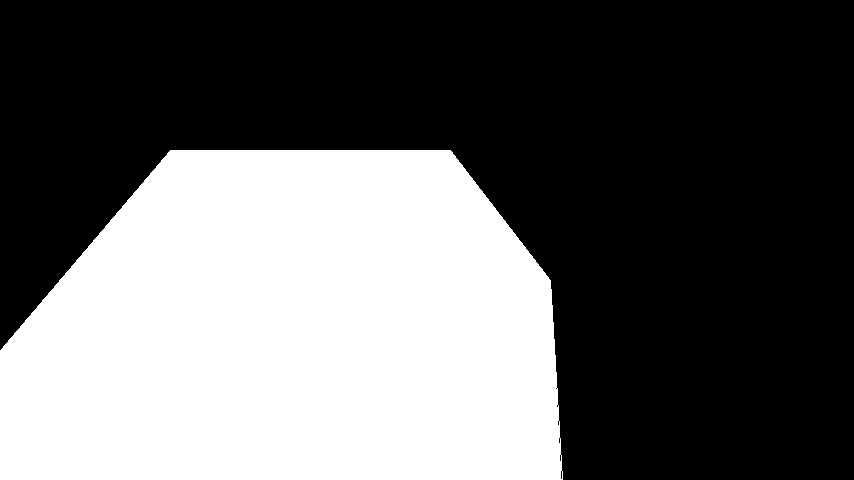

In [31]:
"""Here I am creating a mask to only crop out the part which is Region of Our Interest."""
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
mask = np.zeros((480,854), dtype=np.uint8)
points = np.array([[[170,150],[450,150],[550,280],[565,550],[0,480],[0,350]]])
cv2.fillPoly(mask, points, (255))
cv2_imshow(mask)


On traffic.mp4 with masking

In [34]:
"""
Since Earlier video was taking too long to execute I have trimmed the video to one minute length and I am predicting on that.
Here In this snippet I am tracking the objects in both the lanes.
"""
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import time
from deep_sort import generate_detections as gdet

video_path   = "/content/Traffic.mp4"

def Object_tracking(Yolo, video_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors='', Track_only = []):
    # Definition of the parameters
    max_cosine_distance = 0.7
    nn_budget = None
    CLASSES=YOLO_COCO_CLASSES
    #initialize deep sort object
    model_filename = 'model_data/mars-small128.pb'
    encoder = gdet.create_box_encoder(model_filename, batch_size=1)
    metric = NearestNeighborDistanceMetric("cosine", max_cosine_distance, nn_budget)
    tracker = Tracker(metric)

    times, times_2 = [], []

    if video_path:
        vid = cv2.VideoCapture(video_path) # detect on video
    else:
        vid = cv2.VideoCapture(0) # detect from webcam

    # by default VideoCapture returns float instead of int
    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4

    NUM_CLASS = read_class_names(CLASSES)
    key_list = list(NUM_CLASS.keys()) 
    val_list = list(NUM_CLASS.values())
    while True:
        _, frame = vid.read()

        try:
          
            original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB)
        except:
            break
        original_frame = cv2.bitwise_and(original_frame,original_frame,mask = mask)
        image_data = image_preprocess(np.copy(original_frame), [input_size, input_size])
        #image_data = tf.expand_dims(image_data, 0)
        image_data = image_data[np.newaxis, ...].astype(np.float32)

        t1 = time.time()
        if YOLO_FRAMEWORK == "tf":
            pred_bbox = Yolo.predict(image_data)
        elif YOLO_FRAMEWORK == "trt":
            batched_input = tf.constant(image_data)
            result = Yolo(batched_input)
            pred_bbox = []
            for key, value in result.items():
                value = value.numpy()
                pred_bbox.append(value)
        
        #t1 = time.time()
        pred_bbox = Yolo.predict(image_data)
        t2 = time.time()
        pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
        pred_bbox = tf.concat(pred_bbox, axis=0)

        bboxes = postprocess_boxes(pred_bbox, original_frame, input_size, score_threshold)
        bboxes = nms(bboxes, iou_threshold, method='nms')        
        # extract bboxes to boxes (x, y, width, height), scores and names
        boxes, scores, names = [], [], []
        for bbox in bboxes:
            if len(Track_only) !=0 and NUM_CLASS[int(bbox[5])] in Track_only or len(Track_only) == 0:
                boxes.append([bbox[0].astype(int), bbox[1].astype(int), bbox[2].astype(int)-bbox[0].astype(int), bbox[3].astype(int)-bbox[1].astype(int)])
                scores.append(bbox[4])
                names.append(NUM_CLASS[int(bbox[5])])

        # Obtain all the detections for the given frame.
        boxes = np.array(boxes) 
        names = np.array(names)
        scores = np.array(scores)
        features = np.array(encoder(original_frame, boxes))
        detections = [Detection(bbox, score, class_name, feature) for bbox, score, class_name, feature in zip(boxes, scores, names, features)]
  
        # Pass detections to the deepsort object and obtain the track information.
        tracker.predict()
        tracker.update(detections)
        classes_n = ['car','bus','truck']
        # Obtain info from the tracks
        tracked_bboxes = []
        for track in tracker.tracks:
            if not track.is_confirmed() or track.time_since_update > 5:
                continue 
            bbox = track.to_tlbr() # Get the corrected/predicted bounding box
            # print(bboc)
            class_name = track.get_class() #Get the class name of particular object
            tracking_id = track.track_id # Get the ID for the particular track
            index = key_list[val_list.index(class_name)] # Get predicted object index by object name
            if class_name in classes_n:
              tracked_bboxes.append(bbox.tolist() + [tracking_id, index]) # Structure data, that we could use it with our draw_bbox function

        image = draw_bbox(original_frame, tracked_bboxes, CLASSES=CLASSES, tracking=True)
        t3 = time.time()
        times.append(t2-t1)
        times_2.append(t3-t1)
  
        times = times[-20:]
        times_2 = times_2[-20:]

        ms = sum(times)/len(times)*1000
        fps = 1000 / ms
        fps2 = 1000 / (sum(times_2)/len(times_2)*1000)
        
        image = cv2.putText(image, "Time: {:.1f} FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)

        # draw original yolo detection
        #image = draw_bbox(image, bboxes, CLASSES=CLASSES, show_label=False, rectangle_colors=rectangle_colors, tracking=True)

        print("Time: {:.2f}ms, Detection FPS: {:.1f}, total FPS: {:.1f}".format(ms, fps, fps2))
        if output_path != '': out.write(image)
        if show:
            cv2_imshow(image)
            if cv2.waitKey(25) & 0xFF == ord("q"):
                cv2.destroyAllWindows()
                break
            
    cv2.destroyAllWindows()


yolo = Load_Yolo_model()
Object_tracking(yolo, video_path, "detection.mp4", input_size=YOLO_INPUT_SIZE, show=False, iou_threshold=0.1, rectangle_colors=(255,0,0))


GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: /content/drive/MyDrive/Yolo/yolov3.weights.1
Time: 1300.34ms, Detection FPS: 0.8, total FPS: 0.7
Time: 736.62ms, Detection FPS: 1.4, total FPS: 1.2
Time: 540.84ms, Detection FPS: 1.8, total FPS: 1.6
Time: 442.09ms, Detection FPS: 2.3, total FPS: 2.0
Time: 382.93ms, Detection FPS: 2.6, total FPS: 2.3
Time: 342.46ms, Detection FPS: 2.9, total FPS: 2.5
Time: 312.83ms, Detection FPS: 3.2, total FPS: 2.7
Time: 291.66ms, Detection FPS: 3.4, total FPS: 2.9
Time: 273.81ms, Detection FPS: 3.7, total FPS: 3.1
Time: 260.12ms, Detection FPS: 3.8, total FPS: 3.3
Time: 247.86ms, Detection FPS: 4.0, total FPS: 3.4
Time: 237.76ms, Detection FPS: 4.2, total FPS: 3.6
Time: 229.49ms, Detection FPS: 4.4, total FPS: 3.7
Time: 222.58ms, Detection FPS: 4.5, total FPS: 3.8
Time: 215.73ms, Detection FPS: 4.6, total FPS: 3.9
Time: 209.84ms, Detection FPS: 4.8, total FPS: 4.0
Time: 204.61ms, Detection FPS: 4.9, 

On traffic.mp4 for left lane

In [ ]:
"""
- Here in this snippet I have created the two tracker objects one for left lane vehicles and one for the right lane vehicles \
  by putting some conditions on the pixels in the image so that the objects detected till that pixel will be considered in left lane
  and one after that will be considered as right lane objects.

- Here I am showing the output of the left tracker

"""

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import time
from deep_sort import generate_detections as gdet

video_path   = "/content/Traffic.mp4"

def Object_tracking(Yolo, video_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors='', Track_only = []):
    # Definition of the parameters
    max_cosine_distance = 0.7
    nn_budget = None
    CLASSES=YOLO_COCO_CLASSES
    #initialize deep sort object
    model_filename = 'model_data/mars-small128.pb'
    encoder = gdet.create_box_encoder(model_filename, batch_size=1)
    metric = NearestNeighborDistanceMetric("cosine", max_cosine_distance, nn_budget)
    tracker_left = Tracker(metric)
    tracker_right = Tracker(metric)
    times, times_2 = [], []

    if video_path:
        vid = cv2.VideoCapture(video_path) # detect on video
    else:
        vid = cv2.VideoCapture(0) # detect from webcam

    # by default VideoCapture returns float instead of int
    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4

    NUM_CLASS = read_class_names(CLASSES)
    key_list = list(NUM_CLASS.keys()) 
    val_list = list(NUM_CLASS.values())
    count_car = 0
    count_bus = 0
    count_truck = 0
    while True:

        _, frame = vid.read()

        try:
          
            original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB)
        except:
            break
        original_frame = cv2.bitwise_and(original_frame,original_frame,mask = mask)
        image_data = image_preprocess(np.copy(original_frame), [input_size, input_size])
        #image_data = tf.expand_dims(image_data, 0)
        image_data = image_data[np.newaxis, ...].astype(np.float32)

        t1 = time.time()
        if YOLO_FRAMEWORK == "tf":
            pred_bbox = Yolo.predict(image_data)
        elif YOLO_FRAMEWORK == "trt":
            batched_input = tf.constant(image_data)
            result = Yolo(batched_input)
            pred_bbox = []
            for key, value in result.items():
                value = value.numpy()
                pred_bbox.append(value)
        
        t1 = time.time()
        pred_bbox = Yolo.predict(image_data)

        t2 = time.time()
        pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
        pred_bbox = tf.concat(pred_bbox, axis=0)

        bboxes = postprocess_boxes(pred_bbox, original_frame, input_size, score_threshold)
        bboxes = nms(bboxes, iou_threshold, method='nms')  

        boxes_left, scores_left, names_left, boxes_right, scores_right, names_right = [], [], [], [], [], []
        for bbox in bboxes:
          if len(Track_only) !=0 and NUM_CLASS[int(bbox[5])] in Track_only or len(Track_only) == 0:
            if (bbox[0].astype(int))<250:
                boxes_left.append([bbox[0].astype(int), bbox[1].astype(int), bbox[2].astype(int)-bbox[0].astype(int), bbox[3].astype(int)-bbox[1].astype(int)])
                scores_left.append(bbox[4])
                names_left.append(NUM_CLASS[int(bbox[5])])
            else:
                boxes_right.append([bbox[0].astype(int), bbox[1].astype(int), bbox[2].astype(int)-bbox[0].astype(int), bbox[3].astype(int)-bbox[1].astype(int)])
                scores_right.append(bbox[4])
                names_right.append(NUM_CLASS[int(bbox[5])])           
        # extract bboxes to boxes (x, y, width, height), scores and names


        # Obtain all the detections for the given frame.

        boxes_left = np.array(boxes_left)
        names_left = np.array(names_left)
        for i in names_left:
          if i=='car':
            count_car+=1
          elif i=='bus':
            count_bus+=1
          elif i=='truck':
            count_truck+=1
        scores_left = np.array(scores_left)
        boxes_right = np.array(boxes_right)
        names_right = np.array(names_right)
        scores_right = np.array(scores_right)        

        features_left = np.array(encoder(original_frame, boxes_left))
        detections_left = [Detection(bbox, score, class_name, feature) for bbox, score, class_name, feature in zip(boxes_left, scores_left, names_left, features_left)]
        features_right = np.array(encoder(original_frame, boxes_right))
        detections_right = [Detection(bbox, score, class_name, feature) for bbox, score, class_name, feature in zip(boxes_right, scores_right, names_right, features_right)]
    
    #     # Obtain info from the tracks
        tracker_left.predict()
        tracker_left.update(detections_left)
        # tracker_right.predict()
        # tracker_right.update(detections_right)

        classes_n = ['car','bus','truck']


    #   #LEFT LANE
        tracked_bboxes = []

        for track in tracker_left.tracks:

            if not track.is_confirmed() or track.time_since_update > 5:
                continue 
            bbox = track.to_tlbr() # Get the corrected/predicted bounding box
            class_name = track.get_class() #Get the class name of particular object
   
            # if class_name in classes_n:

            # print(index)
            

            if class_name in classes_n:
              # if class_name =='car':
              #   count_car += index
              # elif class_name =='bus':
              #   count_bus += index
              # elif class_name =='truck':
              #   count_truck += index
              tracking_id = track.track_id # Get the ID for the particular track
              index = key_list[val_list.index(class_name)] # Get predicted object index by object name  
              tracked_bboxes.append(bbox.tolist() + [tracking_id, index]) # Structure data, that we could use it with our draw_bbox function
            

    #     #Right LANE
    #     tracked_bboxes = []
    # #     tracked_bboxes1 = []
    #     for track in tracker_left.tracks:
    #         if not track.is_confirmed() or track.time_since_update > 5:
    #             continue 
    #         bbox = track.to_tlbr() # Get the corrected/predicted bounding box
    #         class_name = track.get_class() #Get the class name of particular object
    #         tracking_id = track.track_id # Get the ID for the particular track
    #         index = key_list[val_list.index(class_name)] # Get predicted object index by object name
    #         tracked_bboxes.append(bbox.tolist() + [tracking_id, index]) # Structure data, that we could use it with our draw_bbox function

        # total=sum(summation)

        image = draw_bbox(original_frame, tracked_bboxes, CLASSES=CLASSES, tracking=True)
        
        t3 = time.time()
        times.append(t2-t1)
        times_2.append(t3-t1)
        times = times[-20:]
        times_2 = times_2[-20:]

        ms = sum(times)/len(times)*1000
        fps = 1000 / ms
        fps2 = 1000 / (sum(times_2)/len(times_2)*1000)
        
        image = cv2.putText(image, "Time: {:.1f} FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
 
        # image = cv2.putText(image, "cars: {:.1f} ,bus:{:.1f}, Truck:{:.1f}".format(count_car,count_bus,count_truck), (200, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
        # draw original yolo detection
        #image = draw_bbox(image, bboxes, CLASSES=CLASSES, show_label=False, rectangle_colors=rectangle_colors, tracking=True)

        print("Time: {:.2f}ms, Detection FPS: {:.1f}, total FPS: {:.1f}".format(ms, fps, fps2))
        
        if output_path != '': out.write(image)
        if show:
            cv2_imshow(image)
            if cv2.waitKey(25) & 0xFF == ord("q"):
                cv2.destroyAllWindows()
                break
            
    cv2.destroyAllWindows()


yolo = Load_Yolo_model()
Object_tracking(yolo, video_path, "detection_left.mp4", input_size=YOLO_INPUT_SIZE, show=False, iou_threshold=0.1, rectangle_colors=(255,0,0))


GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: /content/drive/MyDrive/Yolo/yolov3.weights.1
Time: 58.55ms, Detection FPS: 17.1, total FPS: 4.5
Time: 58.74ms, Detection FPS: 17.0, total FPS: 6.5
Time: 58.53ms, Detection FPS: 17.1, total FPS: 7.6
Time: 57.87ms, Detection FPS: 17.3, total FPS: 8.3
Time: 57.63ms, Detection FPS: 17.4, total FPS: 8.8
Time: 57.43ms, Detection FPS: 17.4, total FPS: 9.2
Time: 58.11ms, Detection FPS: 17.2, total FPS: 9.4
Time: 57.91ms, Detection FPS: 17.3, total FPS: 9.7
Time: 57.56ms, Detection FPS: 17.4, total FPS: 9.9
Time: 57.45ms, Detection FPS: 17.4, total FPS: 10.1
Time: 57.74ms, Detection FPS: 17.3, total FPS: 10.2
Time: 57.70ms, Detection FPS: 17.3, total FPS: 10.4
Time: 57.43ms, Detection FPS: 17.4, total FPS: 10.4
Time: 57.17ms, Detection FPS: 17.5, total FPS: 10.5
Time: 57.65ms, Detection FPS: 17.3, total FPS: 10.5
Time: 57.45ms, Detection FPS: 17.4, total FPS: 10.6
Time: 57.29ms, Detection FPS: 

On traffic.mp4 right lane

In [25]:
"""
- Here in this snippet I have created the two tracker objects one for left lane vehicles and one for the right lane vehicles \
  by putting some conditions on the pixels in the image so that the objects detected till that pixel will be considered in left lane
  and one after that will be considered as right lane objects.

- Here I am showing the output of the Right tracker

"""

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import time
from deep_sort import generate_detections as gdet

video_path   = "/content/Traffic.mp4"

def Object_tracking(Yolo, video_path, output_path, input_size=416, show=False, CLASSES=YOLO_COCO_CLASSES, score_threshold=0.3, iou_threshold=0.45, rectangle_colors='', Track_only = []):
    # Definition of the parameters
    max_cosine_distance = 0.7
    nn_budget = None
    CLASSES=YOLO_COCO_CLASSES
    #initialize deep sort object
    model_filename = 'model_data/mars-small128.pb'
    encoder = gdet.create_box_encoder(model_filename, batch_size=1)
    metric = NearestNeighborDistanceMetric("cosine", max_cosine_distance, nn_budget)
    tracker_left = Tracker(metric)
    tracker_right = Tracker(metric)
    times, times_2 = [], []

    if video_path:
        vid = cv2.VideoCapture(video_path) # detect on video
    else:
        vid = cv2.VideoCapture(0) # detect from webcam

    # by default VideoCapture returns float instead of int
    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, codec, fps, (width, height)) # output_path must be .mp4

    NUM_CLASS = read_class_names(CLASSES)
    key_list = list(NUM_CLASS.keys()) 
    val_list = list(NUM_CLASS.values())
    count_car = 0
    count_bus = 0
    count_truck = 0
    while True:

        _, frame = vid.read()

        try:
          
            original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB)
        except:
            break
        original_frame = cv2.bitwise_and(original_frame,original_frame,mask = mask)
        image_data = image_preprocess(np.copy(original_frame), [input_size, input_size])
        #image_data = tf.expand_dims(image_data, 0)
        image_data = image_data[np.newaxis, ...].astype(np.float32)

        t1 = time.time()
        if YOLO_FRAMEWORK == "tf":
            pred_bbox = Yolo.predict(image_data)
        elif YOLO_FRAMEWORK == "trt":
            batched_input = tf.constant(image_data)
            result = Yolo(batched_input)
            pred_bbox = []
            for key, value in result.items():
                value = value.numpy()
                pred_bbox.append(value)
        
        t1 = time.time()
        pred_bbox = Yolo.predict(image_data)

        t2 = time.time()
        pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
        pred_bbox = tf.concat(pred_bbox, axis=0)

        bboxes = postprocess_boxes(pred_bbox, original_frame, input_size, score_threshold)
        bboxes = nms(bboxes, iou_threshold, method='nms')  

        boxes_left, scores_left, names_left, boxes_right, scores_right, names_right = [], [], [], [], [], []
        for bbox in bboxes:
          if len(Track_only) !=0 and NUM_CLASS[int(bbox[5])] in Track_only or len(Track_only) == 0:
            if (bbox[0].astype(int))<250:
                boxes_left.append([bbox[0].astype(int), bbox[1].astype(int), bbox[2].astype(int)-bbox[0].astype(int), bbox[3].astype(int)-bbox[1].astype(int)])
                scores_left.append(bbox[4])
                names_left.append(NUM_CLASS[int(bbox[5])])
            else:
                boxes_right.append([bbox[0].astype(int), bbox[1].astype(int), bbox[2].astype(int)-bbox[0].astype(int), bbox[3].astype(int)-bbox[1].astype(int)])
                scores_right.append(bbox[4])
                names_right.append(NUM_CLASS[int(bbox[5])])           
        # extract bboxes to boxes (x, y, width, height), scores and names


        # Obtain all the detections for the given frame.

        boxes_left = np.array(boxes_left)
        names_left = np.array(names_left)
        # for i in names_left:
        #   if i=='car':
        #     count_car+=1
        #   elif i=='bus':
        #     count_bus+=1
        #   elif i=='truck':
        #     count_truck+=1
        scores_left = np.array(scores_left)
        boxes_right = np.array(boxes_right)
        names_right = np.array(names_right)
       for i in names_right:
          if i=='car':
            count_car+=1
          elif i=='bus':
            count_bus+=1
          elif i=='truck':
            count_truck+=1
        scores_right = np.array(scores_right)        

        features_left = np.array(encoder(original_frame, boxes_left))
        detections_left = [Detection(bbox, score, class_name, feature) for bbox, score, class_name, feature in zip(boxes_left, scores_left, names_left, features_left)]
        features_right = np.array(encoder(original_frame, boxes_right))
        detections_right = [Detection(bbox, score, class_name, feature) for bbox, score, class_name, feature in zip(boxes_right, scores_right, names_right, features_right)]
    



    """
       Use Uncomment tracker left for left lane prediction and Use tracker Right for
       Right Lane Prediction
    """
        # tracker_left.predict()
        # tracker_left.update(detections_left)
        tracker_right.predict()
        tracker_right.update(detections_right)

        classes_n = ['car','bus','truck']





    """Left Lane Counting"""

    # #   #LEFT LANE
    #     tracked_bboxes = []

    #     for track in tracker_left.tracks:

    #         if not track.is_confirmed() or track.time_since_update > 5:
    #             continue 
    #         bbox = track.to_tlbr() # Get the corrected/predicted bounding box
    #         class_name = track.get_class() #Get the class name of particular object
  
            

    #         if class_name in classes_n:
    #           tracking_id = track.track_id # Get the ID for the particular track
    #           index = key_list[val_list.index(class_name)] # Get predicted object index by object name  
    #           tracked_bboxes.append(bbox.tolist() + [tracking_id, index]) # Structure data, that we could use it with our draw_bbox function
            





    """Right Lane Counting"""

        tracked_bboxes = []
    #     tracked_bboxes1 = []
        for track in tracker_right.tracks:
            if not track.is_confirmed() or track.time_since_update > 5:
                continue 
            bbox = track.to_tlbr() # Get the corrected/predicted bounding box
            class_name = track.get_class() #Get the class name of particular object
            tracking_id = track.track_id # Get the ID for the particular track
            index = key_list[val_list.index(class_name)] # Get predicted object index by object name  
            if class_name in classes_n:
              
              tracked_bboxes.append(bbox.tolist() + [tracking_id, index]) # Structure data, that we could use it with our draw_bbox function
 





        image = draw_bbox(original_frame, tracked_bboxes, CLASSES=CLASSES, tracking=True)
        
        t3 = time.time()
        times.append(t2-t1)
        times_2.append(t3-t1)
        times = times[-20:]
        times_2 = times_2[-20:]

        ms = sum(times)/len(times)*1000
        fps = 1000 / ms
        fps2 = 1000 / (sum(times_2)/len(times_2)*1000)
        
        image = cv2.putText(image, "Time: {:.1f} FPS".format(fps), (0, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
 
        # image = cv2.putText(image, "cars: {:.1f} ,bus:{:.1f}, Truck:{:.1f}".format(count_car,count_bus,count_truck), (200, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
    
        print("Time: {:.2f}ms, Detection FPS: {:.1f}, total FPS: {:.1f}".format(ms, fps, fps2))
        
        if output_path != '': out.write(image)
        if show:
            cv2_imshow(image)
            if cv2.waitKey(25) & 0xFF == ord("q"):
                cv2.destroyAllWindows()
                break
            
    cv2.destroyAllWindows()


yolo = Load_Yolo_model()
Object_tracking(yolo, video_path, "detection_right.mp4", input_size=YOLO_INPUT_SIZE, show=False, iou_threshold=0.1, rectangle_colors=(255,0,0))


GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: /content/drive/MyDrive/Yolo/yolov3.weights.1
Time: 87.87ms, Detection FPS: 11.4, total FPS: 3.9
Time: 84.84ms, Detection FPS: 11.8, total FPS: 5.4
Time: 81.19ms, Detection FPS: 12.3, total FPS: 6.3
Time: 79.27ms, Detection FPS: 12.6, total FPS: 6.9
Time: 76.01ms, Detection FPS: 13.2, total FPS: 7.4
Time: 74.18ms, Detection FPS: 13.5, total FPS: 7.8
Time: 72.82ms, Detection FPS: 13.7, total FPS: 8.2
Time: 72.03ms, Detection FPS: 13.9, total FPS: 8.4
Time: 71.57ms, Detection FPS: 14.0, total FPS: 8.6
Time: 70.72ms, Detection FPS: 14.1, total FPS: 8.7
Time: 69.69ms, Detection FPS: 14.3, total FPS: 9.0
Time: 69.04ms, Detection FPS: 14.5, total FPS: 9.1
Time: 68.15ms, Detection FPS: 14.7, total FPS: 9.3
Time: 67.37ms, Detection FPS: 14.8, total FPS: 9.4
Time: 66.85ms, Detection FPS: 15.0, total FPS: 9.6
Time: 66.25ms, Detection FPS: 15.1, total FPS: 9.7
Time: 65.69ms, Detection FPS: 15.2, t

# **Observations**



*   We can see that just we can successfully detect the vehicles only in one lane and also just by looking at the count on top of the last frame we can get an idea of how many cars,buses,trucks passed on the road.
*   Here we can see that there is a problem of multiple prediction for a single vehicle we can get rid of that by just loading the pretrained weights and trianing for 3-4 epochs on out custom video so that it will give us a single prediction for each vehicle.



# **Applications**

 ***
 - This project can be used on the toll booths in our country :
Simply by installing a camera with this system we can track the vehicles and also count the number of cars,buses,trucks passing from each lane and just by checking the simple count of number of vehicles and its corresponding toll price we can cross verify the amount collected by toll booth from each lanes. This could help in cross verification of revenue generated and how many vehicles didnt pay the toll on the booth.

- Or other application could be to track the vehicles which are not following the lanes rules like there are few lanes only for emergency services, some lanes only for heavy vehicles. We can figure out if a vehicle is following that rule or not.
***